# Capstone Project: Predicting Outcomes of Asylum Cases

**Author:** Paria Elyasi<br>
**Contact:** pariae@me.com<br>
**Date:** 09-19-2022<br>
**Notebook**: 1 of 5<br>

## Overview

Every year people come to the United States seeking protection because they have suffered persecution or fear that they will suffer persecution due to their race, belief, nationality, political opinion, or being members of particular social group. These people can apply for **Asylum** once they are in the United States.

There are two types of **Asylum**:
- **Affirmative Asylum**  
    - If affirmative application is denied, the applicant goes into removal/deportation proceedings and can file for defensive Asylum. 
    - Affirmative asylum cases are overseen by USCIS (U.S. Citizenship and Immigration Services). 
    
    
- **Defensive Asylum**
    - If the immigrant without an immigration status is put into removal proceedings, they can apply for defensive asylum.
    - Defensive Asylum cases are overseen by Immigration Judges.
    
    
It’s a long and difficult journey for those who seek asylum in the unites states. Their journey doesn’t end until they have their case outcome and that’s whether it was accepted or rejected. 

In this project, we will be predicting outcomes of asylum cases to assist immigration attorneys gain better insight and change their approaches accordingly for a favorable outcome. 

The data used in this project is from the U.S Department of Justice. Please see the citation below for more details. Initially the data collected from DOJ was imported into SQL Server and migrated to MySQL Workbench. The data had many tables that were joined and queried in MySQL Workbench. Once it was queried with the columns we needed, it was exported to csv for cleaning and next steps. For more details please refer to the **project report**. 

**Please Note:** This is **notebook 1 of 5** that were used to make our final conclusions.
In this notebook, we will be **loading in our dataset** that we queried in SQL, **cleaning our dataset** and conducting a **basic Exploratory Data Analysis** to better understand our dataset.

**Project Citation**: 
U.S. Department of Justice, Executive Office for Immigration Review. EOIR Case Data (July 2019). Ann Arbor, MI: Inter-university Consortium for Political and Social Research [distributor], 2020-07-07. https://doi.org/10.3886/E120222V1

---

## Table of Contents

[1. Loading the Data](#Loading-the-Data)<br>
* [1.1. Data Dictionary](#Data-Dictionary)<br>


[2. Basic Exploratory Data Analysis](#Basic-Exploratory-Data-Analysis)<br>


[3. Data Cleaning](#Data-Cleaning)<br>
* [3.1. Duplicated Rows](#Duplicated-Rows)<br>
* [3.2. Duplicated Columns](#Duplicated-Columns)<br>
* [3.3. Missing Values](#Missing-Values)<br>
* [3.4. Saving the Data](#Saving-the-Data)<br>



[4. Summary](#Summary)<br>

---

# Notebook 1

# Data Cleaning & Basic Exploratory Data Analysis

In this notebook, we will be loading in our dataset that we queried in SQL, cleaning our dataset and conducting a basic Exploratory Data Analysis to better understand our dataset.

---

## Loading the Data

In this section we will import our libraries, load in our dataset, and look at our dataset shape and info to gain initial insight. 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting figure size
plt.rcParams['figure.figsize'] = (10, 7)

In [3]:
#import/read the data
df_asylum = pd.read_csv('data/immigration_asylum_dataset.csv')

In [4]:
#check the data - 5 first rows
df_asylum.head()

,IDNCASE,NAT_CODE,NATIONALITY,GENDER,BIRTHDATE,LANG_CODE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_TYPE,...,HEARING_CITY,HEARING_STATE,CUSTODY_CODE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DEC_CODE,DECISION
0,3293523,GT,GUATEMALA,F,12/1971,AGC,AGUACATECO,OMAHA,NE,DEP,...,EL PASO,TX,N,Never Detained,N,0.0,Y,VJ2,D,DEPORTED
1,4245818,AL,ALBANIA,F,11/1968,ALB,ALBANIAN,PHILADELPHIA,PA,AOC,...,PHILADELPHIA,PA,R,Released,N,4.0,N,CMH,D,DEPORTED
2,4245825,AL,ALBANIA,M,2/1990,ALB,ALBANIAN,PHILADELPHIA,PA,AOC,...,PHILADELPHIA,PA,R,Released,N,1.0,N,CMH,D,DEPORTED
3,4233710,AL,ALBANIA,F,6/1961,ALB,ALBANIAN,UPPER DARBY,PA,RMV,...,PHILADELPHIA,PA,R,Released,N,2.0,N,RPM,R,RELIEF/RESCINDED
4,4233710,AL,ALBANIA,F,6/1961,ALB,ALBANIAN,UPPER DARBY,PA,RMV,...,PHILADELPHIA,PA,R,Released,N,2.0,N,RPM,X,REMOVED


In [5]:
#look at 5 random rows
df_asylum.sample(5)

,IDNCASE,NAT_CODE,NATIONALITY,GENDER,BIRTHDATE,LANG_CODE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_TYPE,...,HEARING_CITY,HEARING_STATE,CUSTODY_CODE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DEC_CODE,DECISION
425543,8058377,JM,JAMAICA,M,11/1988,ENG,ENGLISH,MOUNT VERNON,NY,RMV,...,NEW YORK,NY,R,Released,N,0.0,N,CC1,X,REMOVED
375031,7805052,GT,GUATEMALA,F,1/1992,SP,SPANISH,CHATTANOOGA,TN,RMV,...,MEMPHIS,TN,N,Never Detained,N,0.0,N,RJA,R,RELIEF/RESCINDED
338427,7820212,MX,MEXICO,F,7/1986,SP,SPANISH,EL GRANADA,CA,RMV,...,SAN FRANCISCO,CA,N,Never Detained,N,0.0,N,CSG,R,RELIEF/RESCINDED
208513,7495574,CO,COLOMBIA,M,4/1994,SP,SPANISH,Elmhurst,NY,RMV,...,BUFFALO,NY,N,Never Detained,N,NaN,Y,PJM,X,REMOVED
141759,7600358,GT,GUATEMALA,M,1/2000,SP,SPANISH,LOUISVILLE,KY,RMV,...,LOUISVILLE,KY,N,Never Detained,N,0.0,Y,RLH,X,REMOVED


In [6]:
#get shape of dataframe
df_asylum.shape

(482854, 25)

There are **482,854** rows and **25** columns(features/variables) in our data.

In [7]:
#get info about our data
df_asylum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482854 entries, 0 to 482853
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   IDNCASE           482854 non-null  int64  
 1   NAT_CODE          482835 non-null  object 
 2   NATIONALITY       482854 non-null  object 
 3   GENDER            482854 non-null  object 
 4   BIRTHDATE         482854 non-null  object 
 5   LANG_CODE         482854 non-null  object 
 6   LANGUAGES         482854 non-null  object 
 7   ALIEN_CITY        473655 non-null  object 
 8   ALIEN_STATE       478693 non-null  object 
 9   CASE_TYPE         482854 non-null  object 
 10  CASE_DESCRIPTION  482854 non-null  object 
 11  DATE_OF_ENTRY     290331 non-null  object 
 12  NOTICE_DATE       482852 non-null  object 
 13  HEARING_DATE      471009 non-null  object 
 14  HEARING_LOC_CODE  482854 non-null  object 
 15  HEARING_CITY      482854 non-null  object 
 16  HEARING_STATE     48

In order to understand our data better, let's look at our data dictionary below.

#### Data Dictionary

|**Column Name**| **Description**| **Data Type** |
| :--- | :--- |:--- |
|**IDNCASE**| Index for cases - Note this is not actual case IDs | Numeric |
|**NAT_CODE**| Code for Nationality of the applicants| Categorical |
|**NATIONALITY**| Nationality of the applicants| Categorical |
|**GENDER**| Gender of the applicants | Categorical|
|**BIRTHDATE**| Date of birth of the applicants (month and year only). Note this will be updated to Age|Numeric|
|**LANG_CODE**| Language code of the applicants | Categorical |
|**LANGUAGES**| Languages the applicant speaks| Categorical |
|**ALIEN_CITY**| The city applicant is currently residing|Categorical |
|**ALIEN_STATE**| The state applicant is currently residing in | Categorical |
|**CASE_TYPE**| This is the code for the type of applicant's case | Categorical |
|**CASE_DESCRIPTION**| This is the applicant's case description|Categorical |
|**DATE_OF_ENTRY**| The date applicant entered United States| Datetime
|**NOTICE_DATE**| The date applicant received notice to appear in immigration court | Datetime
|**HEARING_DATE**| The date of case hearing at the immigration court| Datetime
|**HEARING_LOC_CODE**| The location code of the immigration court for the case hearing | Categorical |
|**HEARING_CITY**| The city of the immigration court for the case hearing |Categorical |
|**HEARING_STATE**|The state of the immigration court for the case hearing |Categorical |
|**CUSTODY_CODE**| Code for whether the applicant had ever been in custody of immigration officers (detained or not)|Categorical |
|**CUSTODY**|Whether the applicant had ever been in custody of immigration officers (detained or not) |Categorical |
|**CRIMINAL_RECORD**| Criminal history and background of the applicants|Categorical |
|**ATTY_NBR**| Whether or not the applicant had immigration lawyer representation and the number of lawyers| Numeric|
|**ABSENTIA**| Whether or not the applicant was absent during their case hearing|Categorical |
|**IJ_CODE**|Immigration Judges' Initials | Categorical |
|**DEC_CODE**| The decision code showing whether the case was approved or rejected by the immigration judge|Categorical |
|**DECISION**| Whether the case was approved or rejected by the immigration judge|Categorical |

Field of interest (target) is **DECISION**: was the case approved or rejected?

From the above information about our data, we can see that:
- Several columns have null values included because the counts don't equal to 482,854.
- `DATE_OF_ENTRY`, `NOTICE_DATE`, and `HEARING_DATE` are set as string (object) type and we need to convert them to datetime format. 
- Column 11 (`DATE_OF_ENTRY`) is missing roughly 40% of the data rows and column 20 (`ATTY_NBR`) is missing roughly 60% of the data rows. 
- `ATTY_NBR` datatype is a float64 which could be changed to an integer.
    - Note that `ATTY_NBR` can also be changed to categorical to show if applicant had representation or not.
    - It could also stay numerical . We will asses later in preprocessing and decide. 
- `BIRTHDATE` is a date column, currently its datatype is object and will be changed to datetime format. 
    - Note that `BIRTHDATE` needs to be featured engineered to `AGE` and updated to integer datatype. 
    
Let's update the date columns to datetime format next. 

In [8]:
#look at date columns before converting to datetime format
df_asylum[['DATE_OF_ENTRY', 'NOTICE_DATE', 'HEARING_DATE']]

,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE
0,1994-03-01 00:00:00.000,1994-07-21 00:00:00.000,1994-12-14 00:00:00.000
1,2001-12-08 00:00:00.000,2001-12-08 00:00:00.000,2003-03-19 00:00:00.000
2,2001-12-08 00:00:00.000,2001-12-08 00:00:00.000,2003-03-19 00:00:00.000
3,2000-11-06 00:00:00.000,2001-08-17 00:00:00.000,2005-01-13 00:00:00.000
4,2000-11-06 00:00:00.000,2001-08-17 00:00:00.000,2002-02-26 00:00:00.000
...,...,...,...
482849,2014-12-17 00:00:00.000,2017-11-03 00:00:00.000,2017-12-19 00:00:00.000
482850,2013-10-21 00:00:00.000,2019-05-17 00:00:00.000,2019-07-31 00:00:00.000
482851,2016-09-08 00:00:00.000,2016-09-09 00:00:00.000,2018-10-19 00:00:00.000
482852,2016-01-09 00:00:00.000,2016-01-30 00:00:00.000,2016-11-16 00:00:00.000


In [9]:
#converting date columns from string data type to datetime format
df_asylum['DATE_OF_ENTRY'] = df_asylum['DATE_OF_ENTRY'].astype('datetime64')
df_asylum['NOTICE_DATE'] = df_asylum['NOTICE_DATE'].astype('datetime64')
df_asylum['HEARING_DATE'] = df_asylum['HEARING_DATE'].astype('datetime64')

Next we will check to make sure all date columns datatype has been changed to datetime. 

In [10]:
#recheck data type to make sure date format has been changed
df_asylum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482854 entries, 0 to 482853
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   IDNCASE           482854 non-null  int64         
 1   NAT_CODE          482835 non-null  object        
 2   NATIONALITY       482854 non-null  object        
 3   GENDER            482854 non-null  object        
 4   BIRTHDATE         482854 non-null  object        
 5   LANG_CODE         482854 non-null  object        
 6   LANGUAGES         482854 non-null  object        
 7   ALIEN_CITY        473655 non-null  object        
 8   ALIEN_STATE       478693 non-null  object        
 9   CASE_TYPE         482854 non-null  object        
 10  CASE_DESCRIPTION  482854 non-null  object        
 11  DATE_OF_ENTRY     290331 non-null  datetime64[ns]
 12  NOTICE_DATE       482852 non-null  datetime64[ns]
 13  HEARING_DATE      471009 non-null  datetime64[ns]
 14  HEAR

In [11]:
#look at date columns after converting to datetime format
df_asylum[['DATE_OF_ENTRY', 'NOTICE_DATE', 'HEARING_DATE']]

,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE
0,1994-03-01,1994-07-21,1994-12-14
1,2001-12-08,2001-12-08,2003-03-19
2,2001-12-08,2001-12-08,2003-03-19
3,2000-11-06,2001-08-17,2005-01-13
4,2000-11-06,2001-08-17,2002-02-26
...,...,...,...
482849,2014-12-17,2017-11-03,2017-12-19
482850,2013-10-21,2019-05-17,2019-07-31
482851,2016-09-08,2016-09-09,2018-10-19
482852,2016-01-09,2016-01-30,2016-11-16


Great, we can confirm that `DATE_OF_ENTRY`, `NOTICE_DATE`, and `HEARING_DATE` columns datatype has successfully been changed to datetime format.

Usually we would do data cleaning prior to Exploratory Data Analysis. However, since we have some missing values, we can do a basic EDA now to understand our dataset better and make a better decisions when imputing these missing values.

Important to note that data cleaning is a separate step and done prior to Exploratory Data Analysis. We should not mix these two steps. As mentioned, we want to get some basic insights into our data therefore prior to cleaning our data we will do a simple data analysis. 

## Basic Exploratory Data Analysis

Let's see the number of cases per year to get a better understanding of our dataset. 

First we will look at the date range to see what is the range in dates for `HEARING_DATE` as the decision is made by the judge at the hearing. 

In [12]:
import datetime
date_range = str(df_asylum['HEARING_DATE'].dt.year.min()) + ' to ' +str(df_asylum['HEARING_DATE'].dt.year.max())
date_range

'1961.0 to 2022.0'

We can see that our hearing date years are from 1961 to 2022. Since we queried only cases related to asylum cases, we might not have the same case distribution across the years. Let's look at the unique years and also look at the value counts for each year to see how many cases we have for each year. 

In [13]:
#Look at what years are the cases from in our dataset
df_asylum['HEARING_DATE'].dt.year.unique()

array([1994., 2003., 2005., 2002., 2000., 1996., 2001., 2012., 2017.,
       2009., 1998., 1995., 1999., 2007., 2008., 2011., 2006.,   nan,
       2004., 2010., 1997., 1993., 1987., 1990., 1991., 1989., 1992.,
       2013., 2018., 2019., 1988., 1984., 2016., 2015., 2014., 1982.,
       2020., 2021., 1985., 1986., 1983., 1961., 1976., 2022.])

Note that even after changing the date columns to datetime format we are getting float values back for year. We won't worry about that right now as we know we have changed the datatype to datetime. 

In [14]:
df_asylum['HEARING_DATE'].dtypes

dtype('<M8[ns]')

Let's see the total number of cases per year. 

In [15]:
#value counts for hearing date
df_asylum['HEARING_DATE'].dt.year.value_counts()

2017.0    75797
2018.0    75114
2016.0    71439
2015.0    64570
2019.0    50635
2014.0    38809
2013.0    18024
2010.0    17887
2012.0    17570
2011.0    17505
2009.0    12476
2008.0     5075
2007.0     3678
2006.0      613
2005.0      411
2004.0      255
2003.0      243
2002.0      171
2001.0      101
1998.0       95
2020.0       84
2000.0       78
1999.0       75
1997.0       60
1995.0       53
1996.0       52
1991.0       21
2021.0       20
1994.0       19
1993.0       15
1990.0       14
1992.0       11
1989.0       11
1986.0        6
1982.0        5
1988.0        4
1985.0        4
1987.0        3
1984.0        2
1983.0        1
1961.0        1
1976.0        1
2022.0        1
Name: HEARING_DATE, dtype: int64

We can see that as expected, we only have 1-100 cases for years 1961 to 2000. Also in the most recent years on 2020, 2021, and 2022 there aren't many cases in our dataset. That is due to the cases from years 2020, 2021, and 2022 not having a decision made yet, therefore it didn't make it in the initial query we did in SQL. 

Again, reminder that we queried the data from the Department of Justice on cases that had a decision made, and on cases that were asylum related. 

We could either keep all the cases or only keep the ones higher than a 1,000. 

For now we will keep all and decide as we get into preprocessing and modeling. 

Let's also visualize the cases per year to get a better understanding of the date ranges in our dataset. 

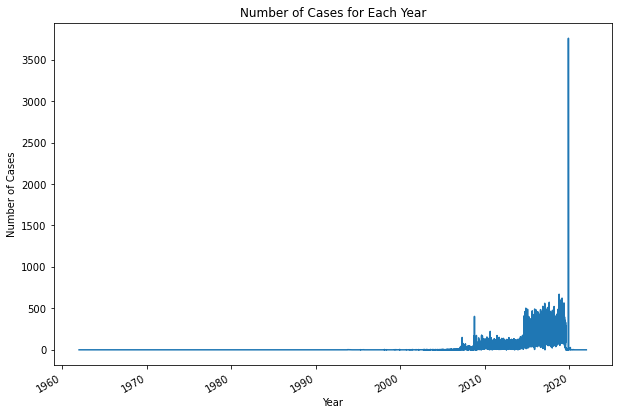

In [16]:
#plot cases per year in dataset
plt.figure()
df_asylum['HEARING_DATE'].value_counts().plot()
plt.title('Number of Cases for Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()

Looking at the above graph, we can see that majority of the cases in our dataset are from **2007 to 2019**. There is a **spike between 2016 to 2018** as **47% of our dataset is from 2016 to 2017**. 

Let's look at how many numeric columns our dataset has.

In [17]:
#top 5 rows of only numeric columns
df_asylum.select_dtypes('number').head()

,IDNCASE,ATTY_NBR
0,3293523,0.0
1,4245818,4.0
2,4245825,1.0
3,4233710,2.0
4,4233710,2.0


We can see that our dataset only has 2 numeric columns. Note that `IDNCASE` is an index that was in the original dataset and it is not related to an actual Case ID. We can drop this column later. 

Next let's look at all our categorical columns.

In [18]:
#top 5 rows of only object columns
df_asylum.select_dtypes('object').head()

,NAT_CODE,NATIONALITY,GENDER,BIRTHDATE,LANG_CODE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_TYPE,CASE_DESCRIPTION,HEARING_LOC_CODE,HEARING_CITY,HEARING_STATE,CUSTODY_CODE,CUSTODY,CRIMINAL_RECORD,ABSENTIA,IJ_CODE,DEC_CODE,DECISION
0,GT,GUATEMALA,F,12/1971,AGC,AGUACATECO,OMAHA,NE,DEP,Deportation,ELP,EL PASO,TX,N,Never Detained,N,Y,VJ2,D,DEPORTED
1,AL,ALBANIA,F,11/1968,ALB,ALBANIAN,PHILADELPHIA,PA,AOC,Asylum Only Case,PHI,PHILADELPHIA,PA,R,Released,N,N,CMH,D,DEPORTED
2,AL,ALBANIA,M,2/1990,ALB,ALBANIAN,PHILADELPHIA,PA,AOC,Asylum Only Case,PHI,PHILADELPHIA,PA,R,Released,N,N,CMH,D,DEPORTED
3,AL,ALBANIA,F,6/1961,ALB,ALBANIAN,UPPER DARBY,PA,RMV,Removal,PHI,PHILADELPHIA,PA,R,Released,N,N,RPM,R,RELIEF/RESCINDED
4,AL,ALBANIA,F,6/1961,ALB,ALBANIAN,UPPER DARBY,PA,RMV,Removal,PHI,PHILADELPHIA,PA,R,Released,N,N,RPM,X,REMOVED


Let's look at these categorical columns next:

- Gender
- Languages
- Nationality
- Case Description
- Alien State
- Hearing State
- Custody
- Criminal Record
- Absentia
- Immigration Judge Code
- Decision

First, we will look at the `GENDER` column. 

#### `GENDER`

Let's look at the `GENDER` column value counts in our dataset. 

In [19]:
#GENDER value counts
df_asylum['GENDER'].value_counts()

M    356417
F    126437
Name: GENDER, dtype: int64

There are more Males in our dataset than Females. Let's also look at the percentage distribution of Male and Female in our dataset. 

In [20]:
#GENDER value counts by percentage
df_asylum['GENDER'].value_counts(normalize=True)

M    0.738147
F    0.261853
Name: GENDER, dtype: float64

We can see that majority of applicants in our dataset are Male at **74%** vs female applicants at only **26%**.

Next we will visualize the value counts for `GENDER` to get a better idea.

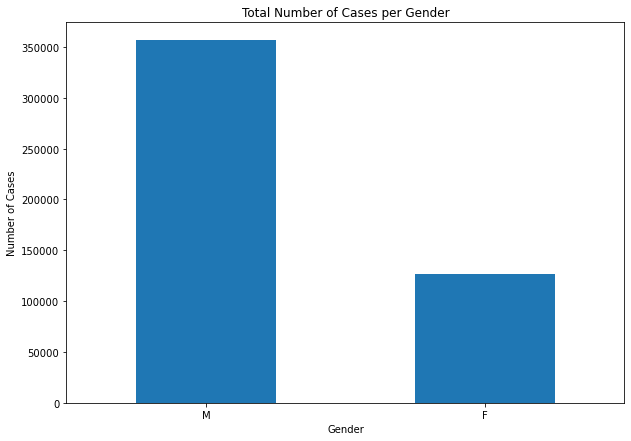

In [21]:
#plot number of cases per gender type
plt.figure()
df_asylum['GENDER'].value_counts().plot(kind='bar')
plt.title('Total Number of Cases per Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.show()

Looking at the above graph, we can see clearly that the number of Male applicants exceeds the number of Female applicants in our dataset.

Next, we will look at `LANGUAGES` column.

#### `LANGUAGES`

First, we wil look at the number of unique languages in our dataset. 

In [22]:
#number of languages in our dataset
df_asylum['LANGUAGES'].nunique()

304

There are **304** unique languages in our dataset. 

Let's look at the value counts and see what are the top languages in our dataset. 

In [23]:
#LANGUAGES value counts
df_asylum['LANGUAGES'].value_counts()

SPANISH                   379490
ENGLISH                    50499
CREOLE                      6926
MANDARIN                    6354
UNKNOWN LANGUAGE            4729
                           ...  
GREBO                          1
RUSSIAN SIGN LANGUAGE          1
ARAMAIC                        1
ARABIC, CHADIAN SPOKEN         1
ISHAN                          1
Name: LANGUAGES, Length: 304, dtype: int64

We can see that **Spanish**, **English**, **Creole** and **Mandarin** are the top 4 languages in our dataset. Note that we also have an **Unknown Language** value in our `LANGUAGES` column. 

Approximately **77%** of applicants in our dataset are **Spanish** speakers. This would also mean that most likely majority of applicants are from **Spanish** speaking countries (South America / Central America).

We saw that there are **304** different languages in our dataset. This shows a diverse applicant range in our dataset. We can also look at nationality column to see how many different nationalities there are in our dataset.

#### `NATIONALITY`

Let's look at nationality value counts to find out which nationalities are in our dataset. 

In [24]:
#NATIONALITY value counts
df_asylum['NATIONALITY'].value_counts()

MEXICO                        156615
GUATEMALA                      97813
HONDURAS                       75162
EL SALVADOR                    52190
HAITI                           8212
                               ...  
LUXEMBOURG                         1
PITCAIRN ISLANDS                   1
SOLOMON ISLANDS                    1
PEOPLE'S REPUBLIC OF BENIN         1
MONACO                             1
Name: NATIONALITY, Length: 220, dtype: int64

We can see that **Mexico** is the top nationality in our dataset meaning we have a lot of asylum applicants from **Mexico**. Let's also look at the percentage distribution of these nationalities to get a better idea. 

In [25]:
#NATIONALITY value counts by percentage
df_asylum['NATIONALITY'].value_counts(normalize=True).sort_values(ascending=False)

MEXICO                               0.324353
GUATEMALA                            0.202573
HONDURAS                             0.155662
EL SALVADOR                          0.108087
HAITI                                0.017007
                                       ...   
EAST TIMOR                           0.000002
SEYCHELLES                           0.000002
FRENCH WEST INDIES                   0.000002
BE REMOVED FROM THE UNITED STATES    0.000002
MONACO                               0.000002
Name: NATIONALITY, Length: 220, dtype: float64

There are **220** different nationalities in our dataset and over **77%** of the applicants have nationalities from **Mexico**, **Central America**, or **South America**. 

Next, we will look at `CASE_DESCRIPTION` column. 

#### `CASE_DESCRIPTION`

Let's look at the unique values in this column first. 

In [26]:
#CASE_DESCRIPTION unique values
df_asylum['CASE_DESCRIPTION'].unique()

array(['Deportation', 'Asylum Only Case', 'Removal',
       'Credible Fear Review', 'Reasonable Fear Case'], dtype=object)

In [27]:
#CASE_DESCRIPTION unique values number
df_asylum['CASE_DESCRIPTION'].nunique()

5

We can see that we have **5 different asylum case types** in our dataset. 
1. Deportation
2. Asylum Only Case
3. Removal
4. Credible Fear Review
5. Reasonable Fear Case

Let's see the frequency of each case type in our dataset. 

In [28]:
#CASE_DESCRIPTION value counts
df_asylum['CASE_DESCRIPTION'].value_counts()

Removal                 468524
Credible Fear Review      9466
Reasonable Fear Case      3883
Deportation                508
Asylum Only Case           473
Name: CASE_DESCRIPTION, dtype: int64

Majority of our asylum case types are **Removal** cases. Next we will look at the percentage distribution of these case types within our data. 

In [29]:
#CASE_DESCRIPTION value counts by percentage
df_asylum['CASE_DESCRIPTION'].value_counts(normalize=True)

Removal                 0.970322
Credible Fear Review    0.019604
Reasonable Fear Case    0.008042
Deportation             0.001052
Asylum Only Case        0.000980
Name: CASE_DESCRIPTION, dtype: float64

We can see that **97%** of recorded rows in our data are **Removal** case types which refers to **Defensive Asylum** case and only **0.1%** are **Asylum Only Case** which refers to **Affirmative Asylum** case. 

**Removal** and **Deportation** are **Defensive Asylum** cases in our data and **Asylum Only Case**, **Reasonable Fear Case**, and **Credible Fear Review** are **Affirmative Asylum** cases. 

Over all **97%** of the cases in our dataset are **Defensive Asylum** and only **3%** of the cases in our dataset are **Affirmative Asylum**. 

This makes sense and expected as majority of **Affirmative Asylum** are reviewed by USCIS and if further review is necessary then it is sent to an immigration judge. If the case is declined by USCIS then the applicant loses status in the United States and is put into removal proceedings in which case the applicant can apply for **Defensive Asylum** case which is then reviewed by the immigration judge and a decision is made. 

Let's visualize the value counts for the `CASE_DESCRIPTION` column.

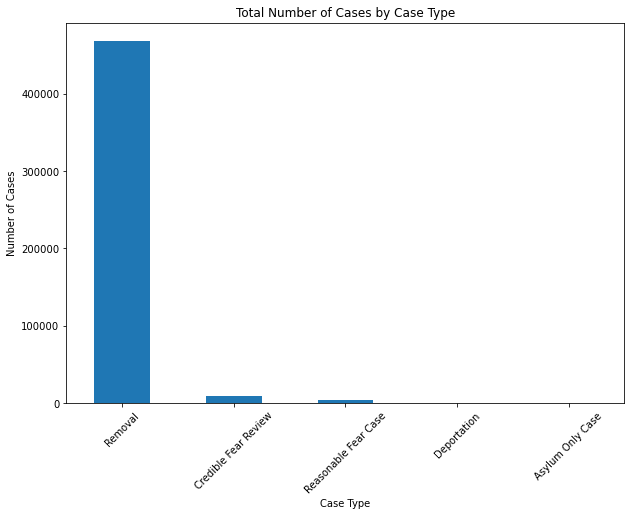

In [30]:
#plot number of cases per case type
plt.figure()
df_asylum['CASE_DESCRIPTION'].value_counts().plot(kind='bar')
plt.title('Total Number of Cases by Case Type')
plt.xlabel('Case Type')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

Looking at the graph above, we can confirm that majority of cases in our dataset are removal cases tied into **Defensive Asylum** cases. 

Next we will look at `ALIEN_STATE` column.

**`ALIEN_STATE`**

Let's look at number of unique States in this column to see how many states are the applicants residing in. 

In [31]:
#state alien resides in number of unique values
df_asylum['ALIEN_STATE'].nunique()

62

There are 62 States that the asylum applicants are residing in. Let's look at these States next. 

In [32]:
#state alien resides in number of unique values
df_asylum['ALIEN_STATE'].unique()

array(['NE', 'PA', 'NY', 'MI', 'FL', 'VA', 'LA', 'CA', 'WA', 'GA', 'KY',
       'CT', 'NJ', 'DE', 'NV', 'OK', 'TX', 'UT', 'NC', 'IL', 'IN', 'OH',
       'HI', 'MA', 'AZ', 'CO', 'MD', 'SC', 'TN', 'NM', 'MN', 'WV', 'ID',
       'MO', 'NH', 'FA', 'WI', 'IA', 'AK', 'GU', 'MP', 'AL', 'MS', 'AR',
       nan, 'OR', 'RI', 'ME', 'SD', 'DC', 'PR', 'KS', 'ND', 'WY', 'VI',
       '<A', '21', 'MT', 'VT', '51', 'OT', '41', 'AA'], dtype=object)

We can see that there are some random symbols and numbers in the state column. Note that these numbers could be the detention center number they are detained in. 

We will look into this further down and fix them if needed as we handle missing values and clean our data. 

Let's look at which States do most our asylum applicants currently reside in?

In [33]:
#value counts for alien state
df_asylum['ALIEN_STATE'].value_counts()

TX    81932
FL    64890
CA    56671
NY    25714
GA    23851
      ...  
21        2
AA        2
51        1
OT        1
41        1
Name: ALIEN_STATE, Length: 62, dtype: int64

In our dataset, **Texas**, **Florida** and **California** are the top 3 states that asylum applicants reside in. 

In [34]:
#value counts for alien state by percentage
df_asylum['ALIEN_STATE'].value_counts(normalize=True)

TX    0.171158
FL    0.135557
CA    0.118387
NY    0.053717
GA    0.049825
        ...   
21    0.000004
AA    0.000004
51    0.000002
OT    0.000002
41    0.000002
Name: ALIEN_STATE, Length: 62, dtype: float64

We can see that approximately **43%** of applicants reside in either **Texas, Florida, or California**.

Let's plot these values to better see our dataset's distribution. 

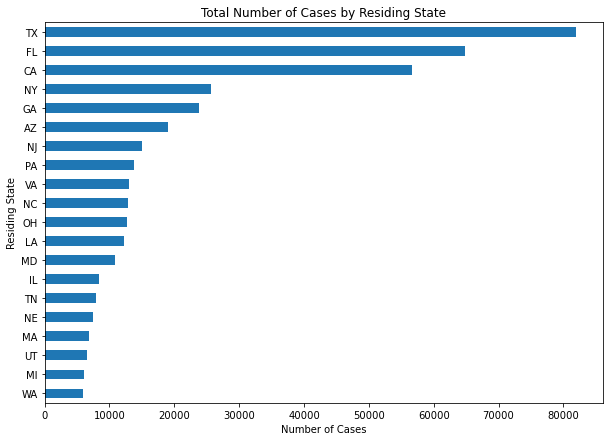

In [35]:
#plot asylum applicant residing state - top 20
plt.figure()
df_asylum['ALIEN_STATE'].value_counts(ascending=True).tail(20).plot(kind='barh') #since ascending is set to true we will look at tail instead of head
plt.title('Total Number of Cases by Residing State')
plt.xlabel('Number of Cases')
plt.ylabel('Residing State')
plt.xticks(rotation=0)
plt.show()

In [36]:
df_asylum['ALIEN_STATE'].value_counts(ascending=False).head()

TX    81932
FL    64890
CA    56671
NY    25714
GA    23851
Name: ALIEN_STATE, dtype: int64

Looking at the above, we can see that a large number of applicants reside in **Texas, Florida, and California**.

Let's look at `HEARING_STATE` column next.

**`HEARING_STATE`**

Not every State in the United States handles Asylum Cases Hearings. Let's look at this column to see how many States in our dataset are holding Asylum Hearings and which States have the most hearings. 

In [37]:
#hearing state number of unique values
df_asylum['HEARING_STATE'].nunique()

43

We can see that there are **43** States that hold Asylum Case Hearings. 

Let's see which States these are next. 

In [38]:
#hearing state unique values
df_asylum['HEARING_STATE'].unique()

array(['TX', 'PA', 'NJ', 'MI', 'FL', 'OH', 'TN', 'CA', 'IL', 'NY', 'MA',
       'LA', 'NE', 'HI', 'CT', 'AZ', 'CO', 'NC', 'MD', 'GA', 'GU', 'MN',
       'NV', 'MO', 'MT', 'KY', 'UT', 'VA', 'WA', 'AK', 'MP', 'NM', 'OR',
       'PR', 'ND', 'VI', 'ID', 'SD', 'IA', 'IN', 'NH', 'OK', 'AL'],
      dtype=object)

We can look at value counts to see which State has the most hearings in our dataset.

In [39]:
#hearing state value counts
df_asylum['HEARING_STATE'].value_counts()

TX    92002
FL    65025
CA    56804
NY    29763
GA    24731
AZ    19364
NC    17627
LA    15622
PA    15201
VA    13748
NJ    13569
OH    13418
IL    12739
NE    11515
MD    10384
TN    10181
UT     7597
MA     7339
MI     6280
WA     5698
MN     5516
NV     5333
MO     5109
CO     5048
KY     3296
CT     3075
NM     2612
HI     1498
OR     1418
ID      419
PR      366
GU      191
MP       97
VI       86
IA       85
AK       26
NH       22
IN       17
MT       13
SD        9
ND        5
OK        3
AL        3
Name: HEARING_STATE, dtype: int64

We can see that **Texas**, **Florida**, and **California** have the highest number of asylum case hearings in our dataset. This makes sense as these States also had the highest number of applicants residency.

Let's look at the percentage of cases for these States. 

In [40]:
#hearing state value counts by percentage
df_asylum['HEARING_STATE'].value_counts(normalize=True)

TX    0.190538
FL    0.134668
CA    0.117642
NY    0.061640
GA    0.051218
AZ    0.040103
NC    0.036506
LA    0.032353
PA    0.031482
VA    0.028472
NJ    0.028102
OH    0.027789
IL    0.026383
NE    0.023848
MD    0.021505
TN    0.021085
UT    0.015734
MA    0.015199
MI    0.013006
WA    0.011801
MN    0.011424
NV    0.011045
MO    0.010581
CO    0.010455
KY    0.006826
CT    0.006368
NM    0.005410
HI    0.003102
OR    0.002937
ID    0.000868
PR    0.000758
GU    0.000396
MP    0.000201
VI    0.000178
IA    0.000176
AK    0.000054
NH    0.000046
IN    0.000035
MT    0.000027
SD    0.000019
ND    0.000010
OK    0.000006
AL    0.000006
Name: HEARING_STATE, dtype: float64

We can see that ~**45%** of case hearings are in **Texas, Florida, and California**.

Let's visualize the value counts to get a better idea.

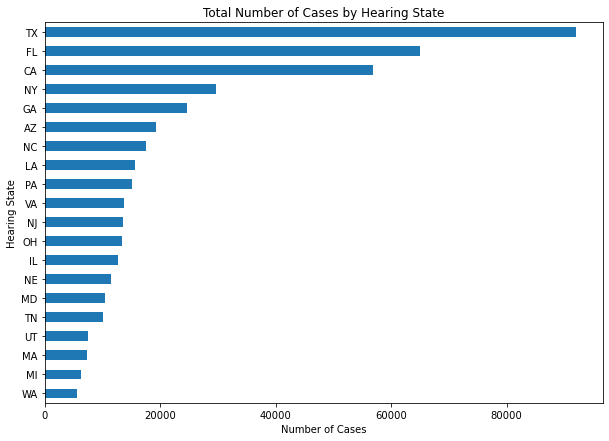

In [41]:
#plot number of cases per hearing state - top 20
plt.figure()
df_asylum['HEARING_STATE'].value_counts(ascending=True).tail(20).plot(kind='barh') #since ascending is set to true we will look at the tail instead of the head
plt.title('Total Number of Cases by Hearing State')
plt.xlabel('Number of Cases')
plt.ylabel('Hearing State')
plt.xticks(rotation=0)
plt.show()

Looking at the above we can see that majority of case hearings are in **Texas, Florida, and California**.

Let's look at `CUSTODY` column next.

**`CUSTODY`**

Let's look at unique values in `CUSTODY` columns first. 

In [42]:
#CUSTODY unique values
df_asylum['CUSTODY'].unique()

array(['Never Detained', 'Released', 'Detained'], dtype=object)

In [43]:
#CUSTODY unique values number
df_asylum['CUSTODY'].nunique()

3

There are **3 different custody types** in our dataset. 
1. Never Detained
2. Released
3. Detained

Note that this only applies to being detained by immigration officers either at the border and customs or at any other point while applying for status in the United States (i.e. by ICE). 

Next, we will look at value counts for each custody type. 

In [44]:
#CUSTODY value counts
df_asylum['CUSTODY'].value_counts()

Detained          213785
Never Detained    207250
Released           61819
Name: CUSTODY, dtype: int64

We can see that majority of applicants in our dataset were detained at the time they applied for **Defensive Asylum** and a small number of applicants were detained by immigration officers at some point and then released. 

Let's look at the percentage distribution of these in our dataset.

In [45]:
#CUSTODY value counts by percentage
df_asylum['CUSTODY'].value_counts(normalize=True)

Detained          0.442753
Never Detained    0.429219
Released          0.128028
Name: CUSTODY, dtype: float64

**44%** of applicants in our dataset were **detained** at the time they applied for **Defensive Asylum** and **43%** were **never detained**. Around **13%** were detained and then **released**. 

If we were to simplify it into only 2 groups of detained/released and never detained then **57%** were **detained/released** and **43%** were **never detained**.

Next we will visualize these value counts.

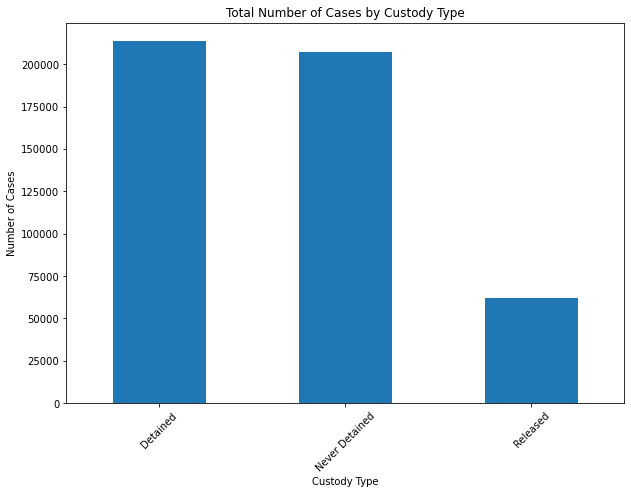

In [46]:
#plot number of cases per custody type
plt.figure()
df_asylum['CUSTODY'].value_counts().plot(kind='bar')
plt.title('Total Number of Cases by Custody Type')
plt.xlabel('Custody Type')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

Looking at the above, we can see that majority of applicants are either detained or never detained. A small number of applicants were detained and released. 

We will look at `CRIMINAL_RECORD` column next.

**`CRIMINAL_RECORD`**

Let's look at value counts in this column first. 

In [47]:
#CRIMINAL_RECORD value counts
df_asylum['CRIMINAL_RECORD'].value_counts()

N    406018
Y     63032
          1
Name: CRIMINAL_RECORD, dtype: int64

**N** is for **No** criminal record and **Y** is for **Yes**.

We can see that majority of applicants in our data set **do not have a criminal record**. 

**NOTE**: There is **1** empty value in our data which looks like an empty space entered. We will remove this later in this data cleaning stage. 

Let's look at the percentage of these.

In [48]:
#CRIMINAL_RECORD value counts by percentage
df_asylum['CRIMINAL_RECORD'].value_counts(normalize=True)

N    0.865616
Y    0.134382
     0.000002
Name: CRIMINAL_RECORD, dtype: float64

**87%** of applicants in our dataset **do no have a criminal record** and **13%** of applicants in our dataset **do have a criminal record**. 

We can also visualize the above value counts to get a better idea. 

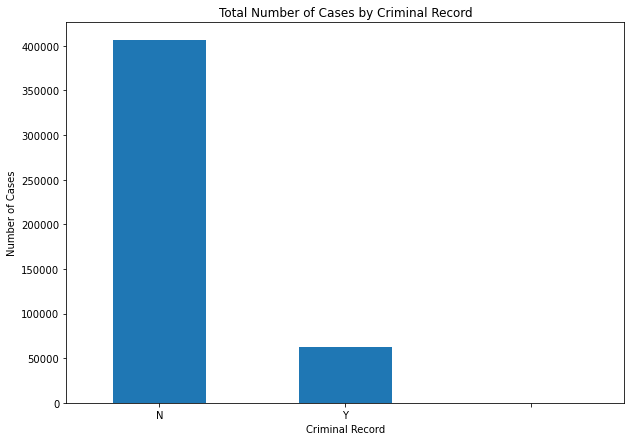

In [49]:
#plot number of cases with and without criminal record
plt.figure()
df_asylum['CRIMINAL_RECORD'].value_counts().plot(kind='bar')
plt.title('Total Number of Cases by Criminal Record')
plt.xlabel('Criminal Record')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.show()

Looking at the above we can see that majority of the applicants in our dataset do not have a criminal record.

Let's look at the `ABSENTIA` column next. 

**`ABSENTIA`**

In this section we will look at the `ABSENTIA` column to see how many applicants in our dataset were either present or absent at their case hearing. 

Let's look at the value counts first. 

In [50]:
#ABSENTIA value counts
df_asylum['ABSENTIA'].value_counts()

N    310425
Y    172422
Name: ABSENTIA, dtype: int64

Absentia column shows whether asylum applicants/seekers were present or absent during their case hearing.
We can see that **majority of them were not absent**. 

Let's look at the percentage distribution.

In [51]:
#ABSENTIA value counts percentage
df_asylum['ABSENTIA'].value_counts(normalize=True)

N    0.642906
Y    0.357094
Name: ABSENTIA, dtype: float64

We can confirm that **64%** of asylum seekers/applicants were **present** at their hearing and only **36%** were **absent**. 

Let's visualize the value counts for this column. 

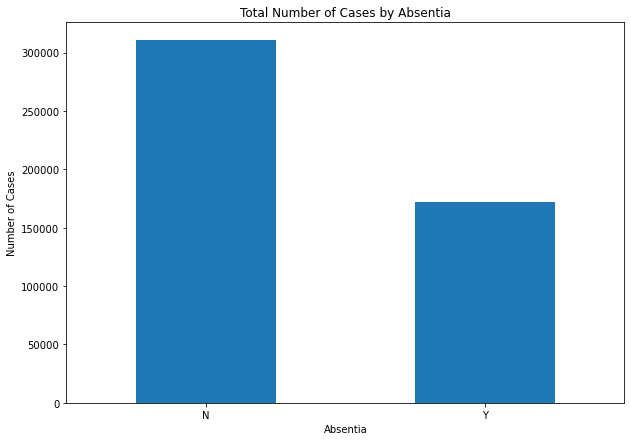

In [52]:
#plot number of cases present or not present at hearing
plt.figure()
df_asylum['ABSENTIA'].value_counts().plot(kind='bar')
plt.title('Total Number of Cases by Absentia')
plt.xlabel('Absentia')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.show()

Looking at the above, we can see that majority of the applicants were present at the time of their case hearing. 

Let's look at the `IJ_CODE` column next. 

#### `IJ_CODE`

In this section we will look at Immigration Judges in our dataset. 

We will look at number of unique Immigration Judges and value count per Immigration Judge. 

In [53]:
#IJ_CODE value counts
df_asylum['IJ_CODE'].value_counts().sort_values(ascending=False)

JN     6650
RJF    6568
THS    6490
DWE    5874
RRO    5766
       ... 
YV1       1
JVC       1
GBP       1
PMS       1
MCK       1
Name: IJ_CODE, Length: 697, dtype: int64

In [54]:
#IJ_CODE unique values number
df_asylum['IJ_CODE'].nunique()

697

There are **697 Immigration Judges** in our dataset with **top 5 judges overlooking more than 5,500 cases each**. 

Immigration Judges **JN, RJF, THS, DWE, and RRO** all reviewed **minimum of 5,500 cases each**.

Note that for privacy reasons, only the Immigration Judges' Initials is included in our dataset.

In [55]:
#IJ_CODE value counts by percentage
df_asylum['IJ_CODE'].value_counts(normalize=True)

JN     0.013826
RJF    0.013656
THS    0.013494
DWE    0.012213
RRO    0.011988
         ...   
JZ     0.000002
AAA    0.000002
KDS    0.000002
RNO    0.000002
MCK    0.000002
Name: IJ_CODE, Length: 697, dtype: float64

The top 5 Immigration judges are in charge of **~10%** cases in our dataset. 

Let's look at the `DECISION` column next.

#### `DECISION` 

In this section, we will be looking at the `DECISION` column and the unique values it holds. 

In [56]:
#DECISION unique values
df_asylum['DECISION'].unique()

array(['DEPORTED', 'RELIEF/RESCINDED', 'REMOVED', 'GRANTED',
       'LEGALLY ADMITTED'], dtype=object)

In [57]:
#DECISION unique values number
df_asylum['DECISION'].nunique()

5

There are 5 decision outcomes made my immigration judges on asylum cases in our dataset. 

1. Deported
2. Removed
3. Granted
4. Legally Admitted
5. Relief / Rescinded

For the purposes of our report, we will be grouping these decisions into two outcomes: **Accepted** or **Rejected**.

 - **Deported** and **Removed** will be grouped as **Rejected**
 
 - **Granted**, **Legally Admitted**, and **Relief/Rescinded** will be grouped as **Accepted**

Let's look at the frequency of each decision outcome in our data.

In [58]:
#DECISION value counts
df_asylum['DECISION'].value_counts()

REMOVED             422671
RELIEF/RESCINDED     46021
LEGALLY ADMITTED     13415
DEPORTED               585
GRANTED                162
Name: DECISION, dtype: int64

Majority of the outcomes are **Rejected** (Removed). To better understand these numbers, we can look at the percentage distribution.

In [59]:
#DECISION value counts by percentage
df_asylum['DECISION'].value_counts(normalize=True)

REMOVED             0.875360
RELIEF/RESCINDED    0.095310
LEGALLY ADMITTED    0.027783
DEPORTED            0.001212
GRANTED             0.000336
Name: DECISION, dtype: float64

Our dataset shows that **88%** of Asylum cases are **Rejected** and only **12%** are **Accepted**.

Let's visualize these next. 

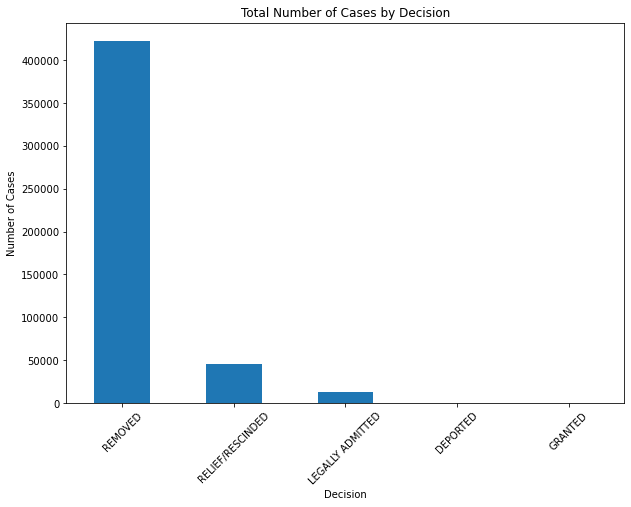

In [60]:
#plot number of cases by Decision
plt.figure()
df_asylum['DECISION'].value_counts().plot(kind='bar')
plt.title('Total Number of Cases by Decision')
plt.xlabel('Decision')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

Looking at the above graph we can see that majority of the cases in our dataset were **Rejected** by the Immigration Judge. This is expected as **Asylum Cases** have the lowest acceptance rate / highest rejection rate amongst all other immigration applications/cases. 

Now that we have a basic understanding of our dataset, we can get back to Data Cleaning. 

Note that we will perform an Advanced Exploratory Data Analysis in the next notebook to find more trends. 

Below are some of the trends we will look at in the Advance EDA notebook.

**In the Advanced Exploratory Analysis Section we will look at :**
 - Trends in judges and rejection/acceptance rate
 - Trends/relationship between nationality and outcome
 - Relationship between being detained and outcome
 - Relationship between age and outcome
 - Relationship between attorney representation and outcome
 - Relationship between criminal history and outcome

Now that we have some initial information about our dataset, we can look at duplicated rows/columns and missing values. 

---

# Data Cleaning 

### Duplicated Rows

Next we will check our data for duplicates. 

In [61]:
#check duplicates in the data
df_asylum.duplicated().sum()

8

In [62]:
#check to see what proportion of data is duplicated
df_asylum.duplicated().sum()/df_asylum.shape[0]

1.656815517734139e-05

From the above calculation, we can see that a very very small portion of our data (0.00001657) is a duplicate which in percentage is about **0.002%**. This is really low!

Let's take a look at duplicated values in our dataset.

In [63]:
#looking at duplicated values
#set the value to false to return all duplicated values as true
duplicate_index = df_asylum.duplicated(keep=False)
df_asylum.loc[duplicate_index, :]

,IDNCASE,NAT_CODE,NATIONALITY,GENDER,BIRTHDATE,LANG_CODE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_TYPE,...,HEARING_CITY,HEARING_STATE,CUSTODY_CODE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DEC_CODE,DECISION
30738,7766133,HO,HONDURAS,F,6/1989,SP,SPANISH,CANTON,GA,RMV,...,ATLANTA,GA,R,Released,N,NaN,Y,EBW,X,REMOVED
30745,7766133,HO,HONDURAS,F,6/1989,SP,SPANISH,CANTON,GA,RMV,...,ATLANTA,GA,R,Released,N,NaN,Y,EBW,X,REMOVED
51941,3764059,MX,MEXICO,M,8/1952,SP,SPANISH,CORONA,CA,RMV,...,LOS ANGELES,CA,N,Never Detained,N,2.0,N,RW,X,REMOVED
51943,3764059,MX,MEXICO,M,8/1952,SP,SPANISH,CORONA,CA,RMV,...,LOS ANGELES,CA,N,Never Detained,N,2.0,N,RW,X,REMOVED
175060,6251662,MX,MEXICO,M,5/1973,SP,SPANISH,LUMPKIN,GA,RMV,...,CHARLOTTE,NC,D,Detained,N,1.0,N,THS,X,REMOVED
175064,6251662,MX,MEXICO,M,5/1973,SP,SPANISH,LUMPKIN,GA,RMV,...,CHARLOTTE,NC,D,Detained,N,1.0,N,THS,X,REMOVED
199174,7346555,MX,MEXICO,M,1/1992,SP,SPANISH,YORK,PA,RMV,...,YORK,PA,D,Detained,N,NaN,N,ARA,X,REMOVED
199175,7346555,MX,MEXICO,M,1/1992,SP,SPANISH,YORK,PA,RMV,...,YORK,PA,D,Detained,N,NaN,N,ARA,X,REMOVED
239609,8923562,GT,GUATEMALA,M,3/2018,SP,SPANISH,LOS ANGELES,CA,RMV,...,LOS ANGELES,CA,N,Never Detained,N,NaN,Y,TNN,X,REMOVED
239610,8923562,GT,GUATEMALA,M,3/2018,SP,SPANISH,LOS ANGELES,CA,RMV,...,LOS ANGELES,CA,N,Never Detained,N,NaN,Y,TNN,X,REMOVED


There are 16 rows that are duplicated, we can drop one of each row that is duplicated which equals to 8 rows total being dropped.

Let's drop the duplicates and create a new dataframe without these duplicates. 

In [64]:
#create a new dataframe with duplicates removed
df_asylum2 = df_asylum.drop_duplicates().copy()

In [65]:
#check dataframe has been created
df_asylum2.head()

,IDNCASE,NAT_CODE,NATIONALITY,GENDER,BIRTHDATE,LANG_CODE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_TYPE,...,HEARING_CITY,HEARING_STATE,CUSTODY_CODE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DEC_CODE,DECISION
0,3293523,GT,GUATEMALA,F,12/1971,AGC,AGUACATECO,OMAHA,NE,DEP,...,EL PASO,TX,N,Never Detained,N,0.0,Y,VJ2,D,DEPORTED
1,4245818,AL,ALBANIA,F,11/1968,ALB,ALBANIAN,PHILADELPHIA,PA,AOC,...,PHILADELPHIA,PA,R,Released,N,4.0,N,CMH,D,DEPORTED
2,4245825,AL,ALBANIA,M,2/1990,ALB,ALBANIAN,PHILADELPHIA,PA,AOC,...,PHILADELPHIA,PA,R,Released,N,1.0,N,CMH,D,DEPORTED
3,4233710,AL,ALBANIA,F,6/1961,ALB,ALBANIAN,UPPER DARBY,PA,RMV,...,PHILADELPHIA,PA,R,Released,N,2.0,N,RPM,R,RELIEF/RESCINDED
4,4233710,AL,ALBANIA,F,6/1961,ALB,ALBANIAN,UPPER DARBY,PA,RMV,...,PHILADELPHIA,PA,R,Released,N,2.0,N,RPM,X,REMOVED


In [66]:
#check shape
df_asylum2.shape

(482846, 25)

In [67]:
#sanity check #1
df_asylum2.shape[0]+8

482854

We can confirm that there were **8 duplicated rows** in our data that have been removed. We will now create a new dataframe without these duplicates. 

In [68]:
#sanity check #2 to confirm no duplicates
df_asylum2.duplicated().sum()

0

In [69]:
#confirm the above by looking at the rows
df_asylum2.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
482849    False
482850    False
482851    False
482852    False
482853    False
Length: 482846, dtype: bool

Next we will look at duplicated columns in our dataset.

---

### Duplicated Columns

In [70]:
#check duplicated columns - commented out due to high computing time
#df_asylum2.T.duplicated()

We don't see any duplicated columns in our dataset, however looking at the data dictionary, we can see that there are several columns that contain the same information. 
- `NAT_CODE` and `NATIONALITY` 
- `LANG_CODE` and `LANGUAGES`
- `CASE_TYPE` and `CASE_DESCRIPTION`
- `HEARING_LOC_CODE` and `HEARING_CITY`
- `CUSTODY_CODE` and `CUSTODY`
- `DEC_CODE` and `DECISION`

We can check these columns to confirm one of them contains duplicate information and can be dropped. 

#### `NAT_CODE` and `NATIONALITY` 

In [71]:
#check NAT_CODE and NATIONALITY
df_asylum2[['NAT_CODE', 'NATIONALITY']]

,NAT_CODE,NATIONALITY
0,GT,GUATEMALA
1,AL,ALBANIA
2,AL,ALBANIA
3,AL,ALBANIA
4,AL,ALBANIA
...,...,...
482849,CH,CHINA
482850,CH,CHINA
482851,CH,CHINA
482852,CH,CHINA


We can confirm that `NAT_CODE` column contains the same information in `NATIONALITY` column and that it can be dropped. 

In [72]:
#drop NAT_CODE
df_asylum2.drop(['NAT_CODE'], axis=1, inplace=True)

In [73]:
#sanity check to make sure column was removed
df_asylum2.head()

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANG_CODE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_TYPE,CASE_DESCRIPTION,...,HEARING_CITY,HEARING_STATE,CUSTODY_CODE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DEC_CODE,DECISION
0,3293523,GUATEMALA,F,12/1971,AGC,AGUACATECO,OMAHA,NE,DEP,Deportation,...,EL PASO,TX,N,Never Detained,N,0.0,Y,VJ2,D,DEPORTED
1,4245818,ALBANIA,F,11/1968,ALB,ALBANIAN,PHILADELPHIA,PA,AOC,Asylum Only Case,...,PHILADELPHIA,PA,R,Released,N,4.0,N,CMH,D,DEPORTED
2,4245825,ALBANIA,M,2/1990,ALB,ALBANIAN,PHILADELPHIA,PA,AOC,Asylum Only Case,...,PHILADELPHIA,PA,R,Released,N,1.0,N,CMH,D,DEPORTED
3,4233710,ALBANIA,F,6/1961,ALB,ALBANIAN,UPPER DARBY,PA,RMV,Removal,...,PHILADELPHIA,PA,R,Released,N,2.0,N,RPM,R,RELIEF/RESCINDED
4,4233710,ALBANIA,F,6/1961,ALB,ALBANIAN,UPPER DARBY,PA,RMV,Removal,...,PHILADELPHIA,PA,R,Released,N,2.0,N,RPM,X,REMOVED


#### `LANG_CODE` and `LANGUAGES`

In [74]:
#check LANG_CODE
df_asylum2[['LANG_CODE', 'LANGUAGES']]

,LANG_CODE,LANGUAGES
0,AGC,AGUACATECO
1,ALB,ALBANIAN
2,ALB,ALBANIAN
3,ALB,ALBANIAN
4,ALB,ALBANIAN
...,...,...
482849,GAN,CHINESE GAN
482850,GAN,CHINESE GAN
482851,GAN,CHINESE GAN
482852,GAN,CHINESE GAN


We can see that `LANG_CODE` column contains the same information as `LANGUAGES` column and we can drop it. 

In [75]:
#drop LANG_CODE
df_asylum2.drop(['LANG_CODE'], axis = 1, inplace=True)

In [76]:
#sanity check to make sure column has been removed
df_asylum2.head()

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_TYPE,CASE_DESCRIPTION,DATE_OF_ENTRY,...,HEARING_CITY,HEARING_STATE,CUSTODY_CODE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DEC_CODE,DECISION
0,3293523,GUATEMALA,F,12/1971,AGUACATECO,OMAHA,NE,DEP,Deportation,1994-03-01,...,EL PASO,TX,N,Never Detained,N,0.0,Y,VJ2,D,DEPORTED
1,4245818,ALBANIA,F,11/1968,ALBANIAN,PHILADELPHIA,PA,AOC,Asylum Only Case,2001-12-08,...,PHILADELPHIA,PA,R,Released,N,4.0,N,CMH,D,DEPORTED
2,4245825,ALBANIA,M,2/1990,ALBANIAN,PHILADELPHIA,PA,AOC,Asylum Only Case,2001-12-08,...,PHILADELPHIA,PA,R,Released,N,1.0,N,CMH,D,DEPORTED
3,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,RMV,Removal,2000-11-06,...,PHILADELPHIA,PA,R,Released,N,2.0,N,RPM,R,RELIEF/RESCINDED
4,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,RMV,Removal,2000-11-06,...,PHILADELPHIA,PA,R,Released,N,2.0,N,RPM,X,REMOVED


#### `CASE_TYPE` and `CASE_DESCRIPTION`

In [77]:
#check CASE_TYPE
df_asylum2[['CASE_TYPE', 'CASE_DESCRIPTION']]

,CASE_TYPE,CASE_DESCRIPTION
0,DEP,Deportation
1,AOC,Asylum Only Case
2,AOC,Asylum Only Case
3,RMV,Removal
4,RMV,Removal
...,...,...
482849,AOC,Asylum Only Case
482850,RMV,Removal
482851,RMV,Removal
482852,RMV,Removal


We can confirm that `CASE_TYPE` column contains the same information in `CASE_DESCRIPTION` column and that it can be dropped.

In [78]:
#drop CASE_TYPE
df_asylum2.drop(['CASE_TYPE'], axis = 1, inplace=True)

In [79]:
#sanity check to make sure column has been removed
df_asylum2.head()

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,...,HEARING_CITY,HEARING_STATE,CUSTODY_CODE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DEC_CODE,DECISION
0,3293523,GUATEMALA,F,12/1971,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,...,EL PASO,TX,N,Never Detained,N,0.0,Y,VJ2,D,DEPORTED
1,4245818,ALBANIA,F,11/1968,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,...,PHILADELPHIA,PA,R,Released,N,4.0,N,CMH,D,DEPORTED
2,4245825,ALBANIA,M,2/1990,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,...,PHILADELPHIA,PA,R,Released,N,1.0,N,CMH,D,DEPORTED
3,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,...,PHILADELPHIA,PA,R,Released,N,2.0,N,RPM,R,RELIEF/RESCINDED
4,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,...,PHILADELPHIA,PA,R,Released,N,2.0,N,RPM,X,REMOVED


#### `HEARING_LOC_CODE` and `HEARING_CITY`

In [80]:
#check HEARING_LOC_CODE
df_asylum2[['HEARING_LOC_CODE', 'HEARING_CITY']]

,HEARING_LOC_CODE,HEARING_CITY
0,ELP,EL PASO
1,PHI,PHILADELPHIA
2,PHI,PHILADELPHIA
3,PHI,PHILADELPHIA
4,PHI,PHILADELPHIA
...,...,...
482849,NYC,NEW YORK
482850,NYC,NEW YORK
482851,NYC,NEW YORK
482852,NYC,NEW YORK


We can confirm that `HEARING_LOC_CODE` column contains the same information in `HEARING_CITY` column and that it can be dropped.

In [81]:
#drop HEARING_LOC_CODE
df_asylum2.drop(['HEARING_LOC_CODE'], axis = 1, inplace=True)

In [82]:
df_asylum2.head()

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,...,HEARING_CITY,HEARING_STATE,CUSTODY_CODE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DEC_CODE,DECISION
0,3293523,GUATEMALA,F,12/1971,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,...,EL PASO,TX,N,Never Detained,N,0.0,Y,VJ2,D,DEPORTED
1,4245818,ALBANIA,F,11/1968,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,...,PHILADELPHIA,PA,R,Released,N,4.0,N,CMH,D,DEPORTED
2,4245825,ALBANIA,M,2/1990,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,...,PHILADELPHIA,PA,R,Released,N,1.0,N,CMH,D,DEPORTED
3,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,...,PHILADELPHIA,PA,R,Released,N,2.0,N,RPM,R,RELIEF/RESCINDED
4,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,...,PHILADELPHIA,PA,R,Released,N,2.0,N,RPM,X,REMOVED


#### `CUSTODY_CODE` and `CUSTODY`

In [83]:
#check CUSTODY_CODE
df_asylum2[['CUSTODY_CODE', 'CUSTODY']]

,CUSTODY_CODE,CUSTODY
0,N,Never Detained
1,R,Released
2,R,Released
3,R,Released
4,R,Released
...,...,...
482849,N,Never Detained
482850,N,Never Detained
482851,R,Released
482852,R,Released


We can confirm that `CUSTODY_CODE` column contains the same information in `CUSTODY` column and that it can be dropped.

In [84]:
#drop CUSTODY_CODE
df_asylum2.drop(['CUSTODY_CODE'], axis = 1, inplace=True)

In [85]:
#sanity check to make sure column has been removed
df_asylum2.head()

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DEC_CODE,DECISION
0,3293523,GUATEMALA,F,12/1971,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,1994-12-14,EL PASO,TX,Never Detained,N,0.0,Y,VJ2,D,DEPORTED
1,4245818,ALBANIA,F,11/1968,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,N,4.0,N,CMH,D,DEPORTED
2,4245825,ALBANIA,M,2/1990,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,N,1.0,N,CMH,D,DEPORTED
3,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2005-01-13,PHILADELPHIA,PA,Released,N,2.0,N,RPM,R,RELIEF/RESCINDED
4,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2002-02-26,PHILADELPHIA,PA,Released,N,2.0,N,RPM,X,REMOVED


#### `DEC_CODE` and `DECISION`

In [86]:
#check DEC_CODE
df_asylum2[['DEC_CODE', 'DECISION']]

,DEC_CODE,DECISION
0,D,DEPORTED
1,D,DEPORTED
2,D,DEPORTED
3,R,RELIEF/RESCINDED
4,X,REMOVED
...,...,...
482849,G,GRANTED
482850,X,REMOVED
482851,R,RELIEF/RESCINDED
482852,R,RELIEF/RESCINDED


We can confirm that `DEC_CODE` column contains the same information in `DECISION` column and that it can be dropped.

In [87]:
#drop DEC_CODE
df_asylum2.drop(['DEC_CODE'], axis = 1, inplace=True)

In [88]:
#sanity check to make sure column has been removed
df_asylum2.head()

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
0,3293523,GUATEMALA,F,12/1971,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,1994-12-14,EL PASO,TX,Never Detained,N,0.0,Y,VJ2,DEPORTED
1,4245818,ALBANIA,F,11/1968,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,N,4.0,N,CMH,DEPORTED
2,4245825,ALBANIA,M,2/1990,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,N,1.0,N,CMH,DEPORTED
3,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2005-01-13,PHILADELPHIA,PA,Released,N,2.0,N,RPM,RELIEF/RESCINDED
4,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2002-02-26,PHILADELPHIA,PA,Released,N,2.0,N,RPM,REMOVED


Great, now that we have dropped all duplication columns, we can look at the missing values and impute those accordingly. 

---

### Missing Values

In this section, we will be looking at missing values / Null values (NaNs) in our dataset. 

Earlier in this notebook, we saw that we have couple of columns that have missing values as the total number or rows did not match the total number of rows in our dataset. 

Let's look at our dataset info again to remind ourselves which columns had missing values. 

In [89]:
#look at data info
df_asylum2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482846 entries, 0 to 482853
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   IDNCASE           482846 non-null  int64         
 1   NATIONALITY       482846 non-null  object        
 2   GENDER            482846 non-null  object        
 3   BIRTHDATE         482846 non-null  object        
 4   LANGUAGES         482846 non-null  object        
 5   ALIEN_CITY        473647 non-null  object        
 6   ALIEN_STATE       478685 non-null  object        
 7   CASE_DESCRIPTION  482846 non-null  object        
 8   DATE_OF_ENTRY     290325 non-null  datetime64[ns]
 9   NOTICE_DATE       482844 non-null  datetime64[ns]
 10  HEARING_DATE      471004 non-null  datetime64[ns]
 11  HEARING_CITY      482846 non-null  object        
 12  HEARING_STATE     482846 non-null  object        
 13  CUSTODY           482846 non-null  object        
 14  CRIM

We can see that `ALIEN_CITY`, `ALIEN_STATE`, `DATE_OF_ENTRY`, `NOTICE_DATE`, `HEARING_DATE`, `CRIMINAL_RECORD`, `ATTY_NBR`, `ABSENTIA`, and `IJ_CODE` all have missing (null) values as the number of rows in all of them are less than **482,846**.

In [90]:
#count total missing values in the entire dataframe
df_asylum2.isna().sum().sum()

526257

Our dataset has total of 526,257 values missing (null). 

Let's take a look at each columns' missing values. 

In [91]:
#count the missing/null/NaN values
df_asylum2.isna().sum()

IDNCASE                  0
NATIONALITY              0
GENDER                   0
BIRTHDATE                0
LANGUAGES                0
ALIEN_CITY            9199
ALIEN_STATE           4161
CASE_DESCRIPTION         0
DATE_OF_ENTRY       192521
NOTICE_DATE              2
HEARING_DATE         11842
HEARING_CITY             0
HEARING_STATE            0
CUSTODY                  0
CRIMINAL_RECORD      13803
ATTY_NBR            292840
ABSENTIA                 7
IJ_CODE               1882
DECISION                 0
dtype: int64

We can see that `ATTY_NBR` and `DATE_OF_ENTRY` have the highest missing values in our dataset. 

Let's look at these by percentage:

In [92]:
#percentage of the missing/null/NaN values
df_asylum2.isna().sum()/df_asylum2.shape[0]*100

IDNCASE              0.000000
NATIONALITY          0.000000
GENDER               0.000000
BIRTHDATE            0.000000
LANGUAGES            0.000000
ALIEN_CITY           1.905162
ALIEN_STATE          0.861765
CASE_DESCRIPTION     0.000000
DATE_OF_ENTRY       39.872133
NOTICE_DATE          0.000414
HEARING_DATE         2.452542
HEARING_CITY         0.000000
HEARING_STATE        0.000000
CUSTODY              0.000000
CRIMINAL_RECORD      2.858675
ATTY_NBR            60.648737
ABSENTIA             0.001450
IJ_CODE              0.389772
DECISION             0.000000
dtype: float64

Below is an alternative way of looking at the columns missing value percentage seperately. 

In [93]:
#percentage of missing values for ATTY_NBR
df_asylum2['ATTY_NBR'].isna().sum()/df_asylum2.shape[0]*100

60.648736864341835

In [94]:
#percentage of missing values for DATE_OF_ENTRY
df_asylum2['DATE_OF_ENTRY'].isna().sum()/df_asylum2.shape[0]*100

39.87213314390095

In [95]:
#percentage of missing values for CRIMINAL_RECORD
df_asylum2['CRIMINAL_RECORD'].isna().sum()/df_asylum2.shape[0]*100

2.85867543688878

In [96]:
#percentage of missing values for HEARING_DATE
df_asylum2['HEARING_DATE'].isna().sum()/df_asylum2.shape[0]*100

2.452541804219151

Majority of the missing values are in `ATTY_NBR` column and `DATE_OF_ENTRY` column: 
- `ATTY_NBR` has the most null values in the dataset at **61%**.
- `DATE_OF_ENTRY` has **40%** of its values missing

In this section we are going to deal with missing values for each column accordingly. 

We will start with `ATTY_NBR`.

#### `ATTY_NBR` Missing Values

In [97]:
#look at missing values total in ATTY_NBR
df_asylum2['ATTY_NBR'].isna().sum()

292840

We already established that there are 292,840 values missing in our `ATTY_NBR` column which is about 60% of the values in that column. 

There are 3 different ways of dealing with missing values in this column but we need to be careful as each would introduce a bias into our dataset. 

Different ways to handle missing values in `ATTY_NBR`:
1. Fill in missing values as **'unknown'**
2. Fill in missing values as **0** meaning there was no attorney representation
3. Fill in missing values with the mean for the column. 

First let's look at the datatype in this column.

In [98]:
#look at ATTY_NBR datatype
df_asylum2['ATTY_NBR'].info()

<class 'pandas.core.series.Series'>
Int64Index: 482846 entries, 0 to 482853
Series name: ATTY_NBR
Non-Null Count   Dtype  
--------------   -----  
190006 non-null  float64
dtypes: float64(1)
memory usage: 7.4 MB


We can see tha the datatype for attorney number column (`ATTY_NBR`) is float, however we want it to be an integer. We will update the datatype to integer after we have filled in the missing values.

Let's look at the average number of attorney's in that column (mean). 

In [99]:
#look at ATTY_NBR stat info (mean, max, min)
df_asylum2['ATTY_NBR'].describe()

count    190006.000000
mean          0.253603
std           0.672738
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          31.000000
Name: ATTY_NBR, dtype: float64

In [100]:
#look at only mean for ATTY_NBR
df_asylum2['ATTY_NBR'].mean()

0.2536025178152269

The average(**Mean**) number of attorneys is 0.3. Note that if we are going to use **mean** to fill in the missing values, we need to either **round up** to **1** or **roudn down** to **0** as there cannot be 0.3 of an attorney. It needs to be a whole number (integer). 

We can also look at **Mode** to see what is the most repeated value (number of attorneys) in the column.

In [101]:
#look at mode for ATTY_NBR
df_asylum2['ATTY_NBR'].mode()

0    0.0
Name: ATTY_NBR, dtype: float64

Let's also look at **Median** to see what is the middle value in our dataset for `ATTY_NBR`.

In [102]:
#look at median for ATTY_NBR
df_asylum2['ATTY_NBR'].median()

0.0

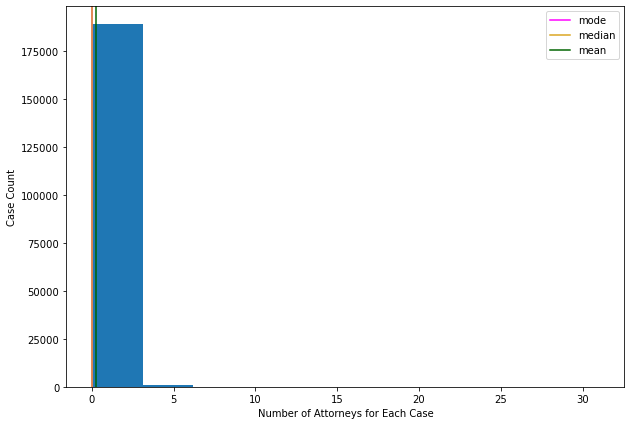

In [103]:
#graph to visualize and decide what standarized value should be used for missing data
plt.figure()
plt.hist(df_asylum2['ATTY_NBR'], bins=10)
plt.axvline(df_asylum2['ATTY_NBR'].mode()[0], color='magenta', label='mode')
plt.axvline(df_asylum2['ATTY_NBR'].median(), color='goldenrod', label='median')
plt.axvline(df_asylum2['ATTY_NBR'].mean(), color='darkgreen', label='mean')
plt.xlabel('Number of Attorneys for Each Case')
plt.ylabel('Case Count')
plt.legend()
plt.show()

Both **mode** and **median** are **0** for number of attorney's and **mean** is closer to **0** than it is to 1. 

We can review the different ways of handling missing values in `ATTY_NBR`:
1. Fill in missing values as **'unknown'**
2. Fill in missing values as **0** meaning there was no attorney representation
3. Fill in missing values with the mean/median/mode for the column. 

We explored option 3 which was to look at mean/median/mode and fill in the missing values with one of those values. After looking at those values, **0** would be the value that we would fill in the missing values with. 
This is also what our option 2 would have been. So at this point option 2 and 3 are the same. 
Our other option was to fill in missing values with unknown. 

**DANGER ZONE:** Every time we fill in missing values or drop missing values, we introduce some type of bias and potentially skew our future analysis. 

With the information provided above and our investigation, we choose to impute the missing values for this column with the value **0** and noting that this can introduce bias and skew our analysis. 

In [104]:
#fill missing values in ATTY_NBR using fillna for the mode
df_asylum2['ATTY_NBR'] = df_asylum2['ATTY_NBR'].fillna(0.0)

In [105]:
#check to see all missing values have been filled
df_asylum2['ATTY_NBR'].isna().sum()

0

Let's update the `ATTY_NBR` data type next. We will change it from a float to an integer. 

In [106]:
#check ATTY_NBR datatype
df_asylum2['ATTY_NBR'].info()

<class 'pandas.core.series.Series'>
Int64Index: 482846 entries, 0 to 482853
Series name: ATTY_NBR
Non-Null Count   Dtype  
--------------   -----  
482846 non-null  float64
dtypes: float64(1)
memory usage: 7.4 MB


In [107]:
#change ATTY_NBR datatype from float to int
df_asylum2['ATTY_NBR'] = df_asylum2['ATTY_NBR'].astype('int64')

Let's check to make sure it has been updated correctly.

In [108]:
#sanity check to make sure ATTY_NBR datatype has been updated
df_asylum2['ATTY_NBR'].info()

<class 'pandas.core.series.Series'>
Int64Index: 482846 entries, 0 to 482853
Series name: ATTY_NBR
Non-Null Count   Dtype
--------------   -----
482846 non-null  int64
dtypes: int64(1)
memory usage: 7.4 MB


In [109]:
#ATTY_NBR values
df_asylum2['ATTY_NBR'].unique()

array([ 0,  4,  1,  2,  3,  5,  8,  6,  7, 10,  9, 14, 12, 31, 13])

In [110]:
#ATTY_NBR values
df_asylum2['ATTY_NBR'].value_counts()

0     451217
1      19791
2       9043
3       1613
4        845
6        146
5        120
8         33
7         19
10        12
9          3
14         1
12         1
31         1
13         1
Name: ATTY_NBR, dtype: int64

Great, now that we have filled in the missing values (NaNs) for `ATTY_NBR` column, we can start working on the missing values for `DATE_OF_ENTRY` column. 

#### `DATE_OF_ENTRY` Missing Values

Let's look at the missing values percentage for the `DATE_OF_ENTRY` column. 

In [111]:
#look at our datasets missing values again in percentage
df_asylum2.isna().sum()/df_asylum2.shape[0]*100

IDNCASE              0.000000
NATIONALITY          0.000000
GENDER               0.000000
BIRTHDATE            0.000000
LANGUAGES            0.000000
ALIEN_CITY           1.905162
ALIEN_STATE          0.861765
CASE_DESCRIPTION     0.000000
DATE_OF_ENTRY       39.872133
NOTICE_DATE          0.000414
HEARING_DATE         2.452542
HEARING_CITY         0.000000
HEARING_STATE        0.000000
CUSTODY              0.000000
CRIMINAL_RECORD      2.858675
ATTY_NBR             0.000000
ABSENTIA             0.001450
IJ_CODE              0.389772
DECISION             0.000000
dtype: float64

In [112]:
#look at DATE_OF_ENTRY total missing values
df_asylum2['DATE_OF_ENTRY'].isna().sum()

192521

In [113]:
#look at DATE_OF_ENTRY datatype
df_asylum2['DATE_OF_ENTRY'].info()

<class 'pandas.core.series.Series'>
Int64Index: 482846 entries, 0 to 482853
Series name: DATE_OF_ENTRY
Non-Null Count   Dtype         
--------------   -----         
290325 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.4 MB


`DATE_OF_ENTRY` has 40% of its data missing. Let's look at the options we have for imputing these missing values:

- easiest and fastest way to impute these missing values is to fill in as 'unknown'
    - Not a good option in our case as date of entry could be important (i.e. the year that applicants entered United States and requested Asylum could be important for our analysis and/or model).

- drop the missing values
    - Not a good option as we would be losing 40% of our data points

- look at mean (average) difference between `DATE_OF_ENTRY` and `NOTICE_DATE`

- separate `DATE_OF_ENTRY` by year and look at the average difference between `DATE_OF_ENTRY` and `NOTICE_DATE`

In [114]:
#check data again
df_asylum2.head()

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
0,3293523,GUATEMALA,F,12/1971,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,1994-12-14,EL PASO,TX,Never Detained,N,0,Y,VJ2,DEPORTED
1,4245818,ALBANIA,F,11/1968,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,N,4,N,CMH,DEPORTED
2,4245825,ALBANIA,M,2/1990,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,N,1,N,CMH,DEPORTED
3,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2005-01-13,PHILADELPHIA,PA,Released,N,2,N,RPM,RELIEF/RESCINDED
4,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2002-02-26,PHILADELPHIA,PA,Released,N,2,N,RPM,REMOVED


Let's look at what the time duration (wait time) is in days from a time an applicant enters Unites States to the time they receive a notice date to appear in court for their immigration case hearing. 

In other words, we will take `NOTICE_DATE` and extract `DATE_OF_ENTRY` from it to get the difference in days. 

In [115]:
#look at the mean (average) difference btw arrival date and notice date and fill in the missing values
(df_asylum2['NOTICE_DATE'] - df_asylum2['DATE_OF_ENTRY']).tolist()

[Timedelta('142 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('284 days 00:00:00'),
 Timedelta('284 days 00:00:00'),
 NaT,
 Timedelta('393 days 00:00:00'),
 Timedelta('216 days 00:00:00'),
 Timedelta('570 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('14 days 00:00:00'),
 Timedelta('113 days 00:00:00'),
 Timedelta('1069 days 00:00:00'),
 Timedelta('1850 days 00:00:00'),
 Timedelta('229 days 00:00:00'),
 Timedelta('229 days 00:00:00'),
 NaT,
 Timedelta('1051 days 00:00:00'),
 NaT,
 Timedelta('4159 days 00:00:00'),
 Timedelta('3916 days 00:00:00'),
 Timedelta('19 days 00:00:00'),
 Timedelta('233 days 00:00:00'),
 Timedelta('313 days 00:00:00'),
 Timedelta('313 days 00:00:00'),
 NaT,
 Timedelta('179 days 00:00:00'),
 Timedelta('221 days 00:00:00'),
 Timedelta('221 days 00:00:00'),
 Timedelta('221 days 00:00:00'),
 Timedelta('145 days 00:00:00'),
 Timedelta('221 days 00:00:00'),
 Timedelta('5 days 00:00:00'),
 Timedelta('3 days 00:00

Now that we have the above info, let's look at the mean, median, mode, min, and max for these days to see which value is best to impute the missing values with. 

First we will assign the above calculation to a variable and later make in into a dataframe to dig a little deeper. 

In [116]:
#put in a variable for above calculation 
date_diff = df_asylum2['NOTICE_DATE'] - df_asylum2['DATE_OF_ENTRY']
date_diff

0         142 days
1           0 days
2           0 days
3         284 days
4         284 days
            ...   
482849   1052 days
482850   2034 days
482851      1 days
482852     21 days
482853    812 days
Length: 482846, dtype: timedelta64[ns]

Next we will look at the statistical summary for the difference in days. 

In [117]:
#look at the statitical summary 
date_diff.describe()

count                          290324
mean     1120 days 04:41:04.909549328
std      2586 days 05:59:13.349044384
min             -43539 days +00:00:00
25%                   1 days 00:00:00
50%                   4 days 00:00:00
75%                 558 days 00:00:00
max               36669 days 00:00:00
dtype: object

Why is there a negative number for the min? Let's look at the data to make sure this is due to the fact that we have missing values (nulls, NaNs).

In [118]:
#query data where the notice date is less than the date of entry
df_asylum2[
    (df_asylum2['NOTICE_DATE'] - df_asylum2['DATE_OF_ENTRY']) <= '-1 days'
]

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
6233,7504431,GUATEMALA,F,10/1984,SPANISH,MAMARONECK,NY,Removal,2014-07-06,2014-07-03,2014-09-17,NEW YORK,NY,Never Detained,N,0,Y,BAN,REMOVED
6237,7504431,GUATEMALA,F,10/1984,SPANISH,MAMARONECK,NY,Removal,2014-07-06,2014-07-03,2014-11-04,NEW YORK,NY,Never Detained,N,0,Y,MMC,REMOVED
7275,8644419,GUATEMALA,F,5/1973,SPANISH,SPRING VALLEY,NY,Removal,2018-05-17,2018-03-17,2018-10-17,NEW YORK,NY,Never Detained,N,0,Y,GJW,REMOVED
7724,7525423,HONDURAS,M,1/1998,SPANISH,BROOKLYN,NY,Removal,2014-06-07,2014-05-11,2014-10-02,NEW YORK,NY,Never Detained,N,0,Y,MMT,REMOVED
8707,7422169,HONDURAS,F,12/1998,SPANISH,HEMPSTEAD,NY,Removal,2014-05-14,2014-05-02,2014-12-09,NEW YORK,NY,Released,N,0,Y,PLB,REMOVED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478114,6801337,GUINEA,M,11/1985,FRENCH,LOS FRESNOS,TX,Removal,2011-07-06,2011-07-05,2011-07-18,LOS FRESNOS,TX,Detained,N,3,N,HEA,REMOVED
478115,6801337,GUINEA,M,11/1985,FRENCH,LOS FRESNOS,TX,Removal,2011-07-06,2011-07-05,2012-12-24,LOS FRESNOS,TX,Detained,N,3,N,HEA,RELIEF/RESCINDED
481082,7511107,ESTONIA,F,6/1990,RUSSIAN,Brooklyn,NY,Asylum Only Case,2013-11-25,2013-06-20,2014-12-03,NEW YORK,NY,Never Detained,NaN,0,Y,AAV,DEPORTED
481302,8851005,RUSSIA,F,5/2007,RUSSIAN,ELVERTA,CA,Removal,2018-09-07,2018-03-22,2019-04-08,SAN FRANCISCO,CA,Never Detained,N,0,N,KBL,RELIEF/RESCINDED


It looks like the notice date is prior to the entry date. This doesn't look right. We can treat these the same as our NaN values and impute with the value we fill in for the missing values. 

In this case as this is a datetime data type, the NaN is NaT meaning Not a Time. We will do that later when we choose our value. 

Now let's look at the mean, median, mode and the quantiles again.

In [119]:
#look at the mean (average) difference btw arrival date and notice date and fill in the missing values
date_diff.mean()

Timedelta('1120 days 04:41:04.909549328')

In [120]:
#look at the median
date_diff.median()

Timedelta('4 days 00:00:00')

In [121]:
#look at the mode
date_diff.mode()

0   1 days
dtype: timedelta64[ns]

In [122]:
#get the quantiles (same as the stat table above)
date_diff.quantile([0.25, 0.5, 0.75, 1])

0.25       1 days
0.50       4 days
0.75     558 days
1.00   36669 days
dtype: timedelta64[ns]

From the above information we can see that the mean average difference between applicant's date of entry and notice date is **1,120 days**. 

The median is **4 days**, that's a big difference. Let's explore the median and see how many applicant's waited  4 days or less and how many waited mored than 4 days. That will give us a better idea on which value to impute these missing values with. 

Let's turn the above into a dataframe. 

In [123]:
#create data frame for date differences
dates_df = pd.DataFrame(date_diff, columns=['Difference'])
dates_df

,Difference
0,142 days
1,0 days
2,0 days
3,284 days
4,284 days
...,...
482849,1052 days
482850,2034 days
482851,1 days
482852,21 days


In [124]:
#check dataframe type - making sure the format stayed the same (timedelta)
dates_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482846 entries, 0 to 482853
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   Difference  290324 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 7.4 MB


Let's query the `dates_df` dataframe to see how many data points have a `difference` of **4 days or less** and how many data points have a `difference` of **more than 4 days**.

In [125]:
#query data of 4 days or less
dates_df[
    dates_df['Difference'] <= '4 days'
]

,Difference
1,0 days
2,0 days
9,0 days
33,3 days
41,3 days
...,...
482740,0 days
482750,0 days
482815,1 days
482817,1 days


In [126]:
#query data of more than 4 days
dates_df[
    dates_df['Difference'] > '4 days'
]

,Difference
0,142 days
3,284 days
4,284 days
6,393 days
7,216 days
...,...
482848,2098 days
482849,1052 days
482850,2034 days
482852,21 days


Let's query the `dates_df` dataframe to see how many data points have a `difference` of **558 days or less** and how many data points have a `difference` of **more than 558 days**.

In [127]:
#query data of more than 558 days
dates_df[
    dates_df['Difference'] > '558 days'
]

,Difference
8,570 days
12,1069 days
13,1850 days
17,1051 days
19,4159 days
...,...
482845,2204 days
482848,2098 days
482849,1052 days
482850,2034 days


In [128]:
#query data of 558 days or less
dates_df[
    dates_df['Difference'] <= '558 days'
]

,Difference
0,142 days
1,0 days
2,0 days
3,284 days
4,284 days
...,...
482833,27 days
482843,513 days
482846,5 days
482851,1 days


Looking at all the values and option above for filling in missing values:
- We can fill them in with the mean average difference of 1,120 days
- We can use the median difference of 4 days
- or we can use the 75% percentile difference of 558 days

We will not be using the median of 4 days as half the data falls over 4 days and we can skew our dates column even more by imputing the median of 4 days. 

Also the mean average difference of 1,120 days isn't ideal as we saw only **25% of the data falls above 558 days** meaning that **75% of data falls below 558 days**. We will use the **558** days as the difference value and fill in the missing values with that. 

Note that we understand that by filling in the missing values, we are introducing our bias into the dataset, however, after much analysis into our data, we are choosing what we believe to be the best option for our dataset.

First we will query to see how many rows are available in the notice date where date of entry is missing. 

In [129]:
#query the data and look at the rows where DATE_OF_ENTRY is missing but NOTICE_DATE  is not
df_asylum2[
    df_asylum2['DATE_OF_ENTRY'].isna() & (df_asylum2['NOTICE_DATE'].notna())
]

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
5,4133319,YUGOSLAVIA,M,1/1979,ALBANIAN,BEACON,NY,Removal,NaT,2000-08-22,2000-09-26,NEWARK,NJ,Detained,N,0,N,RR2,REMOVED
16,3671143,ALGERIA,M,7/1971,ARABIC,WHITTIER,CA,Asylum Only Case,NaT,2000-06-22,2001-07-16,LOS ANGELES,CA,Never Detained,N,2,N,JDL,DEPORTED
18,3671143,ALGERIA,M,7/1971,ARABIC,WHITTIER,CA,Asylum Only Case,NaT,2000-06-22,2007-08-29,LOS ANGELES,CA,Never Detained,N,2,N,JDL,GRANTED
25,3676065,ARMENIA,F,3/2035,ARMENIAN,N. HOLLYWOOD,CA,Removal,NaT,1999-12-14,2000-02-10,LOS ANGELES,CA,Never Detained,N,4,Y,SLS,REMOVED
57,3724539,MONTENEGRO,F,4/1961,BOSNIAN,WATERBURY,CT,Removal,NaT,1999-05-13,1999-06-08,NEW YORK,NY,Never Detained,N,0,N,WVW,REMOVED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482828,8297257,GHANA,F,3/1974,TWI,BRONX,NY,Removal,NaT,2017-08-22,2018-03-15,NEW YORK,NY,Never Detained,N,0,Y,DBS,REMOVED
482834,6112681,GHANA,M,9/1968,TWI,BRONX,NY,Removal,NaT,2008-11-20,2009-07-31,NEW YORK,NY,Never Detained,N,2,N,BAN,REMOVED
482838,8790464,CHINA,M,1/1980,CHINESE GAN,Alvarado,TX,Removal,NaT,2019-01-31,NaT,DALLAS,TX,Detained,Y,0,N,RWK,REMOVED
482839,8536533,TAIWAN,M,9/1974,CHINESE GAN,FLORENCE,AZ,Removal,NaT,2018-06-04,2018-07-25,FLORENCE,AZ,Detained,N,0,N,BAT,REMOVED


We can see that there are **192,520** rows that are available in the `NOTICE_DATE` where we can get use to fill in the missing values for `DATE_OF_ENTRY`. That being said, we have **192,521** missing values in the `DATE_OF_ENTRY` column. 

It look as like we have a row that doesn't have the `NOTICE_DATE`. Let's query it and see. 

In [130]:
#query the data and look at the rows where DATE_OF_ENTRY and NOTICE_DATE is missing
df_asylum2[
    df_asylum2['DATE_OF_ENTRY'].isna() & df_asylum2['NOTICE_DATE'].isna()
]

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
199293,8764295,NICARAGUA,M,11/1992,SPANISH,YORK,PA,Removal,NaT,NaT,NaT,YORK,PA,Detained,NaN,0,NaN,KQG,REMOVED


It looks like this one row has all three date columns missing. We are unable to fill the missing value in this case and since we have a large dataset we can drop this one value. 

In [131]:
#drop the row where all 3 dates are missing as we cannot impute
df_asylum2.drop(df_asylum2[df_asylum2['DATE_OF_ENTRY'].isna() & df_asylum2['NOTICE_DATE'].isna()].index, inplace=True)

In [132]:
#check to see if the 1 value was dropped  - should no longer be in the missing values sum
df_asylum2['DATE_OF_ENTRY'].isna().sum()

192520

We can confirm that the one row has been dropped. Now we can fill in the misisng values from the NOTICE_DATE column. 

In [133]:
#first we will fill in the NaNs by subtracting 558 from the notice date
df_asylum2['DATE_OF_ENTRY'] = np.where(df_asylum2['DATE_OF_ENTRY'].isna(), df_asylum2['NOTICE_DATE'] - pd.DateOffset(days=558), df_asylum2['DATE_OF_ENTRY'])

In [134]:
#check data
df_asylum2.sample(5)

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
156244,7694590,EL SALVADOR,F,3/1984,SPANISH,DALLAS,TX,Removal,2015-04-15,2015-04-16,2015-06-24,DALLAS,TX,Never Detained,N,0,Y,RRO,REMOVED
206611,7445741,MEXICO,M,8/1980,SPANISH,LOS FRESNOS,TX,Removal,2003-03-01,2014-06-15,2014-07-01,LOS FRESNOS,TX,Detained,N,0,N,KHU,REMOVED
54711,8051621,HONDURAS,M,5/2003,SPANISH,COVINGTON,LA,Removal,2015-08-12,2015-08-13,2016-12-09,NEW ORLEANS,LA,Never Detained,N,0,Y,JBL,REMOVED
335883,6149018,DOMINICAN REPUBLIC,M,5/1983,SPANISH,NaN,NaN,Removal,1995-04-05,2009-01-02,2009-02-25,NAPANOCH,NY,Detained,N,0,N,RFS,REMOVED
456395,8443629,MEXICO,M,6/1983,ENGLISH,HENDERSON,NV,Reasonable Fear Case,2016-08-19,2018-02-28,2018-03-14,LAS VEGAS,NV,Detained,NaN,0,N,JLR,LEGALLY ADMITTED


In [135]:
#check column stat summary
(df_asylum2['NOTICE_DATE'] - df_asylum2['DATE_OF_ENTRY']).describe()

count                          482844
mean      896 days 00:52:08.941024416
std      2024 days 05:41:21.824675904
min             -43539 days +00:00:00
25%                   2 days 00:00:00
50%                 558 days 00:00:00
75%                 558 days 00:00:00
max               36669 days 00:00:00
dtype: object

Now let's fix the entry dates that were after the notice date as shown in the stat summary table as min (with negative value).

In [136]:
#query data where the notice date is less than the date of entry
df_asylum2[
    (df_asylum2['NOTICE_DATE'] - df_asylum2['DATE_OF_ENTRY']) <= '-1 days'
]

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
6233,7504431,GUATEMALA,F,10/1984,SPANISH,MAMARONECK,NY,Removal,2014-07-06,2014-07-03,2014-09-17,NEW YORK,NY,Never Detained,N,0,Y,BAN,REMOVED
6237,7504431,GUATEMALA,F,10/1984,SPANISH,MAMARONECK,NY,Removal,2014-07-06,2014-07-03,2014-11-04,NEW YORK,NY,Never Detained,N,0,Y,MMC,REMOVED
7275,8644419,GUATEMALA,F,5/1973,SPANISH,SPRING VALLEY,NY,Removal,2018-05-17,2018-03-17,2018-10-17,NEW YORK,NY,Never Detained,N,0,Y,GJW,REMOVED
7724,7525423,HONDURAS,M,1/1998,SPANISH,BROOKLYN,NY,Removal,2014-06-07,2014-05-11,2014-10-02,NEW YORK,NY,Never Detained,N,0,Y,MMT,REMOVED
8707,7422169,HONDURAS,F,12/1998,SPANISH,HEMPSTEAD,NY,Removal,2014-05-14,2014-05-02,2014-12-09,NEW YORK,NY,Released,N,0,Y,PLB,REMOVED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478114,6801337,GUINEA,M,11/1985,FRENCH,LOS FRESNOS,TX,Removal,2011-07-06,2011-07-05,2011-07-18,LOS FRESNOS,TX,Detained,N,3,N,HEA,REMOVED
478115,6801337,GUINEA,M,11/1985,FRENCH,LOS FRESNOS,TX,Removal,2011-07-06,2011-07-05,2012-12-24,LOS FRESNOS,TX,Detained,N,3,N,HEA,RELIEF/RESCINDED
481082,7511107,ESTONIA,F,6/1990,RUSSIAN,Brooklyn,NY,Asylum Only Case,2013-11-25,2013-06-20,2014-12-03,NEW YORK,NY,Never Detained,NaN,0,Y,AAV,DEPORTED
481302,8851005,RUSSIA,F,5/2007,RUSSIAN,ELVERTA,CA,Removal,2018-09-07,2018-03-22,2019-04-08,SAN FRANCISCO,CA,Never Detained,N,0,N,KBL,RELIEF/RESCINDED


In [137]:
#another way of checking if the Date of Entry is less than Notice Date
df_asylum2[
    df_asylum2['DATE_OF_ENTRY'] > df_asylum2['NOTICE_DATE']
]

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
6233,7504431,GUATEMALA,F,10/1984,SPANISH,MAMARONECK,NY,Removal,2014-07-06,2014-07-03,2014-09-17,NEW YORK,NY,Never Detained,N,0,Y,BAN,REMOVED
6237,7504431,GUATEMALA,F,10/1984,SPANISH,MAMARONECK,NY,Removal,2014-07-06,2014-07-03,2014-11-04,NEW YORK,NY,Never Detained,N,0,Y,MMC,REMOVED
7275,8644419,GUATEMALA,F,5/1973,SPANISH,SPRING VALLEY,NY,Removal,2018-05-17,2018-03-17,2018-10-17,NEW YORK,NY,Never Detained,N,0,Y,GJW,REMOVED
7724,7525423,HONDURAS,M,1/1998,SPANISH,BROOKLYN,NY,Removal,2014-06-07,2014-05-11,2014-10-02,NEW YORK,NY,Never Detained,N,0,Y,MMT,REMOVED
8707,7422169,HONDURAS,F,12/1998,SPANISH,HEMPSTEAD,NY,Removal,2014-05-14,2014-05-02,2014-12-09,NEW YORK,NY,Released,N,0,Y,PLB,REMOVED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478114,6801337,GUINEA,M,11/1985,FRENCH,LOS FRESNOS,TX,Removal,2011-07-06,2011-07-05,2011-07-18,LOS FRESNOS,TX,Detained,N,3,N,HEA,REMOVED
478115,6801337,GUINEA,M,11/1985,FRENCH,LOS FRESNOS,TX,Removal,2011-07-06,2011-07-05,2012-12-24,LOS FRESNOS,TX,Detained,N,3,N,HEA,RELIEF/RESCINDED
481082,7511107,ESTONIA,F,6/1990,RUSSIAN,Brooklyn,NY,Asylum Only Case,2013-11-25,2013-06-20,2014-12-03,NEW YORK,NY,Never Detained,NaN,0,Y,AAV,DEPORTED
481302,8851005,RUSSIA,F,5/2007,RUSSIAN,ELVERTA,CA,Removal,2018-09-07,2018-03-22,2019-04-08,SAN FRANCISCO,CA,Never Detained,N,0,N,KBL,RELIEF/RESCINDED


In [138]:
#fixing entry dates that are after notie date - we will subtract 558 from notice date
df_asylum2['DATE_OF_ENTRY'] = np.where(
    df_asylum2['DATE_OF_ENTRY'] > df_asylum2['NOTICE_DATE'], 
    df_asylum2['NOTICE_DATE'] - pd.DateOffset(days=558), 
    df_asylum2['DATE_OF_ENTRY']
)

In [139]:
#check column stat summary
(df_asylum2['NOTICE_DATE'] - df_asylum2['DATE_OF_ENTRY']).describe()

count                          482844
mean      896 days 10:47:01.164599744
std      2023 days 01:20:11.532034080
min                   0 days 00:00:00
25%                   2 days 00:00:00
50%                 558 days 00:00:00
75%                 558 days 00:00:00
max               36669 days 00:00:00
dtype: object

Great, we have fixed the min days and we no longer have entry dates that are after notice dates. 

Let's do one last sanity check to be sure we have imputed all missing values. 

In [140]:
#sanity check
df_asylum2['DATE_OF_ENTRY'].isna().sum()

0

Next we will look at `NOTICE_DATE` column's missing values. 

#### `NOTICE_DATE` Missing Values

Earlier we saw that `NOTICE_DATE` only has 2 missing values. We already dropped one in the above steps as we were imputing `DATE_OF_ENTRY` missing values. This means we now have only 1 value missing for this column. 

Let's check again to be sure.

In [141]:
#look at our datasets missing values again in percentage
df_asylum2.isna().sum()/df_asylum2.shape[0]*100

IDNCASE             0.000000
NATIONALITY         0.000000
GENDER              0.000000
BIRTHDATE           0.000000
LANGUAGES           0.000000
ALIEN_CITY          1.905166
ALIEN_STATE         0.861767
CASE_DESCRIPTION    0.000000
DATE_OF_ENTRY       0.000000
NOTICE_DATE         0.000207
HEARING_DATE        2.452340
HEARING_CITY        0.000000
HEARING_STATE       0.000000
CUSTODY             0.000000
CRIMINAL_RECORD     2.858474
ATTY_NBR            0.000000
ABSENTIA            0.001243
IJ_CODE             0.389773
DECISION            0.000000
dtype: float64

In [142]:
#look at the total missing values
df_asylum2['NOTICE_DATE'].isna().sum()

1

In [143]:
#query the data and look at the rows where NOTICE_DATE is missing and 'DATE_OF_ENTRY' is not missing
df_asylum2[
    df_asylum2['DATE_OF_ENTRY'].notna() & df_asylum2['NOTICE_DATE'].isna()
]

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
22169,8579393,EL SALVADOR,M,4/1973,SPANISH,ADELANTO,CA,Removal,1998-11-20,NaT,NaT,ADELANTO,CA,Detained,NaN,0,NaN,JML,REMOVED


We can drop this 1 row as both hearing date and notice date are missing and again since we have a large dataset, we can afford to lose 1 row.  

In [144]:
#drop missing value
df_asylum2.drop(df_asylum2[df_asylum2['NOTICE_DATE'].isna()].index, inplace=True)

In [145]:
#sanity check
df_asylum2['NOTICE_DATE'].isna().sum()

0

Great, now that we have taken care of the missing value in this column, we can look at `HEARING_DATE` next.

#### `HEARING_DATE` Missing Values

In this section we will be looking at the missing values for `HEARING_DATE` and imputing them appropriately. 

As always, first let's look at our datasets missing values. 

In [146]:
#remind ourselvs of the pecentage of missing values for each column
df_asylum2.isna().sum()/df_asylum2.shape[0]*100

IDNCASE             0.000000
NATIONALITY         0.000000
GENDER              0.000000
BIRTHDATE           0.000000
LANGUAGES           0.000000
ALIEN_CITY          1.905170
ALIEN_STATE         0.861769
CASE_DESCRIPTION    0.000000
DATE_OF_ENTRY       0.000000
NOTICE_DATE         0.000000
HEARING_DATE        2.452138
HEARING_CITY        0.000000
HEARING_STATE       0.000000
CUSTODY             0.000000
CRIMINAL_RECORD     2.858273
ATTY_NBR            0.000000
ABSENTIA            0.001036
IJ_CODE             0.389774
DECISION            0.000000
dtype: float64

We can see that **2.5%** of `HEARING_DATE` column values are missing. 

Let's look at the total number of rows that have missing values in this column. 

In [147]:
#look at the total missing values
df_asylum2['HEARING_DATE'].isna().sum()

11840

Similar to how we looked at the difference in days between `NOTICE_DATE` and `DATE_OF_ENTRY`, we will look at the difference in days between `HEARING_DATE` and `NOTICE_DATE`. 

Note that in this case `HEARING_DATE` is after `NOTICE_DATE` so when we decide on the value we want to impute our missing values with, we will **add** that value to the `NOTICE_DATE` column. 

Let's create a variable to see these differences in days. 

In [148]:
#calculate the difference between hearing date and notice date
noticedate_diff = df_asylum2['HEARING_DATE'] - df_asylum2['NOTICE_DATE']
noticedate_diff

0         146 days
1         466 days
2         466 days
3        1245 days
4         193 days
            ...   
482849     46 days
482850     75 days
482851    770 days
482852    291 days
482853     92 days
Length: 482844, dtype: timedelta64[ns]

Let's create a dataframe containing the above information. 

In [149]:
#crate a dataframe for the above calculation
noticedate_df = pd.DataFrame(noticedate_diff, columns=['Difference'])
noticedate_df

,Difference
0,146 days
1,466 days
2,466 days
3,1245 days
4,193 days
...,...
482849,46 days
482850,75 days
482851,770 days
482852,291 days


Great, now we can look at the statistical summary for the date difference.

In [150]:
#get the stat summary
noticedate_df.describe()

,Difference
count,471004
mean,227 days 13:07:12.149196184
std,413 days 02:35:26.130960964
min,-3637 days +00:00:00
25%,32 days 00:00:00
50%,97 days 00:00:00
75%,245 days 00:00:00
max,43597 days 00:00:00


Again similar to the date of entry, we are seeing min value has negative days. Let's query our dataset to see these rows. 

In [151]:
#query data where hearing date is less than notice date
df_asylum2[
    (df_asylum2['HEARING_DATE'] - df_asylum2['NOTICE_DATE']) <= '-1 days'
]

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
1657,8102332,LEBANON,M,1/1992,ARABIC,MIAMI,FL,Removal,2016-09-22,2017-01-25,2017-01-24,MIAMI,FL,Detained,N,0,N,ao,REMOVED
1678,8102136,LEBANON,M,8/1992,ARABIC,MIAMI,FL,Removal,2016-09-22,2017-01-25,2017-01-24,MIAMI,FL,Detained,N,0,N,ao,REMOVED
1714,7933759,SYRIA,M,7/2004,ARABIC,IRVINE,CA,Removal,2015-08-26,2016-06-15,2016-02-08,LOS ANGELES,CA,Never Detained,N,0,N,GA,RELIEF/RESCINDED
1730,7933741,SYRIA,M,9/1998,ARABIC,IRVINE,CA,Removal,2015-08-26,2016-06-15,2016-02-08,LOS ANGELES,CA,Never Detained,N,0,N,GA,RELIEF/RESCINDED
1849,7933752,SYRIA,F,9/2007,ARABIC,IRVINE,CA,Removal,2015-08-26,2016-06-15,2016-02-08,LOS ANGELES,CA,Never Detained,N,0,N,GA,RELIEF/RESCINDED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477564,7930069,VIETNAM,F,11/1973,VIETNAMESE,YORK,PA,Removal,1993-08-13,2016-05-25,2016-05-23,YORK,PA,Detained,Y,0,N,KQG,REMOVED
480553,6303429,RUSSIA,F,11/1987,RUSSIAN,CHICAGO,IL,Removal,2009-05-25,2009-08-07,2009-05-19,CHICAGO,IL,Released,N,4,N,CMZ,REMOVED
481304,7591287,RUSSIA,F,9/1976,RUSSIAN,FOLSOM,CA,Removal,2014-06-07,2014-12-16,2014-03-18,SAN FRANCISCO,CA,Never Detained,N,0,Y,LLR,REMOVED
481326,7591282,RUSSIA,M,2/1979,RUSSIAN,FOLSOM,CA,Removal,2014-06-07,2014-12-16,2014-03-18,SAN FRANCISCO,CA,Never Detained,N,0,Y,LLR,REMOVED


We can see that the notice date is after the hearing date. This could be a clerical error where they entered the date for notice date under the hearing date and vise vera. 

The are only 118 rows that have this issue. We will treat them the same as our missing values (NaNs/NaTs).

We will apply the same to these in the imputation step. For now we will continue our analysis to find the best value to impute these. 

In [152]:
#look at the mean
noticedate_df.mean()

Difference   227 days 13:07:12.149196184
dtype: timedelta64[ns]

In [153]:
#look at the mode
noticedate_df.mode()

,Difference
0,14 days


In [154]:
#look at the median
noticedate_df.median()

Difference   97 days
dtype: timedelta64[ns]

Let's look at our dataset to see how many rows have a difference of **97 days** or less, how many rows have a difference of **227 days** or less, and how many rows have a difference of **14 days** or less. 

In [155]:
#query how many data points have a difference of 97 days or less (median of difference)
noticedate_df[ 
    noticedate_df['Difference'] <= '97 days'
]

,Difference
5,35 days
6,37 days
7,33 days
10,25 days
15,22 days
...,...
482844,77 days
482845,76 days
482849,46 days
482850,75 days


In [156]:
#query how many data points have a difference of 227 days or less (mean of difference)
noticedate_df[
    noticedate_df['Difference'] <= '227 days'
]

,Difference
0,146 days
4,193 days
5,35 days
6,37 days
7,33 days
...,...
482847,208 days
482848,194 days
482849,46 days
482850,75 days


In [157]:
#query how many data points have a difference of 14 days or less
noticedate_df[
    noticedate_df['Difference'] <= '14 days'
]

,Difference
126,10 days
127,8 days
364,12 days
498,13 days
499,14 days
...,...
482813,9 days
482814,7 days
482822,8 days
482823,13 days


Seeing that majority of our data points fall within 227 days or less, we will choose the mean difference of **227 days** to impute the missing values in the `HEARING_DATE` column. 

In [158]:
#fill in the NaNs for hearing date by adding 227 days to the Notice date
df_asylum2['HEARING_DATE'] = np.where(df_asylum2['HEARING_DATE'].isna(), df_asylum2['NOTICE_DATE'] + pd.DateOffset(days=227), df_asylum2['HEARING_DATE'])

In [159]:
#check hearing date column missing values
df_asylum2['HEARING_DATE'].isna().sum()

0

Now we need to fix the clerical issue where the `HEARING_DATE` is before `NOTICE_DATE`. 

In [160]:
#query data points where hearing date is less than notice date
df_asylum2[
    df_asylum2['HEARING_DATE'] < df_asylum2['NOTICE_DATE']
]

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
1657,8102332,LEBANON,M,1/1992,ARABIC,MIAMI,FL,Removal,2016-09-22,2017-01-25,2017-01-24,MIAMI,FL,Detained,N,0,N,ao,REMOVED
1678,8102136,LEBANON,M,8/1992,ARABIC,MIAMI,FL,Removal,2016-09-22,2017-01-25,2017-01-24,MIAMI,FL,Detained,N,0,N,ao,REMOVED
1714,7933759,SYRIA,M,7/2004,ARABIC,IRVINE,CA,Removal,2015-08-26,2016-06-15,2016-02-08,LOS ANGELES,CA,Never Detained,N,0,N,GA,RELIEF/RESCINDED
1730,7933741,SYRIA,M,9/1998,ARABIC,IRVINE,CA,Removal,2015-08-26,2016-06-15,2016-02-08,LOS ANGELES,CA,Never Detained,N,0,N,GA,RELIEF/RESCINDED
1849,7933752,SYRIA,F,9/2007,ARABIC,IRVINE,CA,Removal,2015-08-26,2016-06-15,2016-02-08,LOS ANGELES,CA,Never Detained,N,0,N,GA,RELIEF/RESCINDED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477564,7930069,VIETNAM,F,11/1973,VIETNAMESE,YORK,PA,Removal,1993-08-13,2016-05-25,2016-05-23,YORK,PA,Detained,Y,0,N,KQG,REMOVED
480553,6303429,RUSSIA,F,11/1987,RUSSIAN,CHICAGO,IL,Removal,2009-05-25,2009-08-07,2009-05-19,CHICAGO,IL,Released,N,4,N,CMZ,REMOVED
481304,7591287,RUSSIA,F,9/1976,RUSSIAN,FOLSOM,CA,Removal,2014-06-07,2014-12-16,2014-03-18,SAN FRANCISCO,CA,Never Detained,N,0,Y,LLR,REMOVED
481326,7591282,RUSSIA,M,2/1979,RUSSIAN,FOLSOM,CA,Removal,2014-06-07,2014-12-16,2014-03-18,SAN FRANCISCO,CA,Never Detained,N,0,Y,LLR,REMOVED


In [161]:
#fixing hearing dates that are after notice date - we will add 227 to the notice date
df_asylum2['HEARING_DATE'] = np.where(
    df_asylum2['HEARING_DATE'] < df_asylum2['NOTICE_DATE'], 
    df_asylum2['NOTICE_DATE'] + pd.DateOffset(days=227), 
    df_asylum2['HEARING_DATE']
)

Once again check the minimum days in the statistical summary table to make sure the above issue has been fixed. 

In [162]:
#check min in stat summary to make sure clerical issue has been fixed
(df_asylum2['HEARING_DATE'] - df_asylum2['NOTICE_DATE']).describe()

count                         482844
mean     227 days 15:45:43.236324768
std      407 days 20:49:11.508508276
min                  0 days 00:00:00
25%                 33 days 00:00:00
50%                101 days 00:00:00
75%                238 days 00:00:00
max              43597 days 00:00:00
dtype: object

In [163]:
#one last sanity check
df_asylum2['HEARING_DATE'].isna().sum()

0

We have successfully imputed all missing values in the `HEARING_DATE` column. 

Next we will look at the missing values for the `CRIMINAL_RECORD` column. 

#### `CRIMINAL_RECORD` Missing Values

In this section we will look at the missing values for `CRIMINAL_RECORD` column and decide how we will impute them. 

As always we will look at the missing values info from our dataset. 

In [164]:
#look at our datasets missing values again in percentage
df_asylum2.isna().sum()/df_asylum2.shape[0]*100

IDNCASE             0.000000
NATIONALITY         0.000000
GENDER              0.000000
BIRTHDATE           0.000000
LANGUAGES           0.000000
ALIEN_CITY          1.905170
ALIEN_STATE         0.861769
CASE_DESCRIPTION    0.000000
DATE_OF_ENTRY       0.000000
NOTICE_DATE         0.000000
HEARING_DATE        0.000000
HEARING_CITY        0.000000
HEARING_STATE       0.000000
CUSTODY             0.000000
CRIMINAL_RECORD     2.858273
ATTY_NBR            0.000000
ABSENTIA            0.001036
IJ_CODE             0.389774
DECISION            0.000000
dtype: float64

We can see that ~**2.9** of the values in the `CRIMINAL_RECORD` column are missing. Let's see how many rows actually have missing values. 

In [165]:
#look at CRIMINAL_RECORD total missing/NaN values
df_asylum2['CRIMINAL_RECORD'].isna().sum()

13801

There are **13,801** rows in `CRIMINAL_RECORD` column that have missing values. 

Let's remind ourselves with the unique values in this column to best decide how we want to impute these misisng values. 

In [166]:
#look at unique values in CRIMINAL_RECORD column
df_asylum2['CRIMINAL_RECORD'].unique()

array(['N', 'Y', nan, ' '], dtype=object)

In [167]:
#value counts for CRIMINAL_RECORD column
df_asylum2['CRIMINAL_RECORD'].value_counts()

N    406010
Y     63032
          1
Name: CRIMINAL_RECORD, dtype: int64

We can see that The values are 'Y' as in Yes, 'N' as in No. There are missing values NaN and additional value with just empty space. As we don't know the criminal records of the applicants in the dataset, it seems logical to fill in the missing values (NaNs) and the empty spaces with 'Unknown'. 

Before doing so, let's take a look at the distribution of Yes and No once more. 

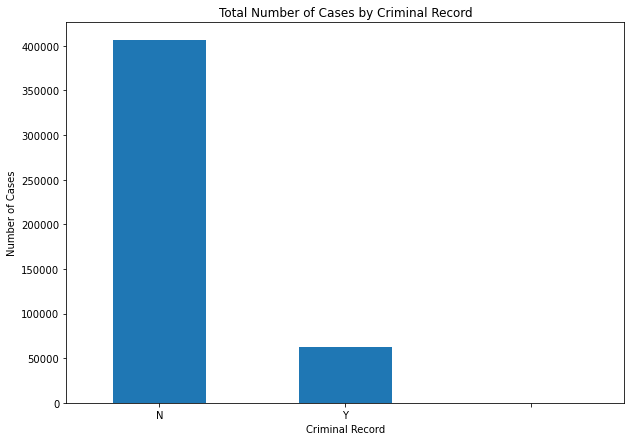

In [168]:
#plot number of cases with and without criminal record
plt.figure()
df_asylum2['CRIMINAL_RECORD'].value_counts().plot(kind='bar')
plt.title('Total Number of Cases by Criminal Record')
plt.xlabel('Criminal Record')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.show()

Now we will fill in the missing values as 'Unknown' and look at the value distribution in this column again.

In [169]:
#fill the NaN values as unknown
df_asylum2['CRIMINAL_RECORD'] = df_asylum2['CRIMINAL_RECORD'].fillna('Unknown')

In [170]:
#check missing values again
df_asylum2['CRIMINAL_RECORD'].isna().sum()

0

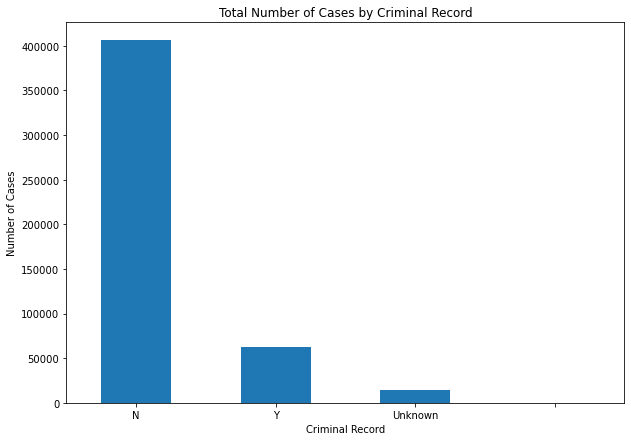

In [171]:
#plot criminal records
plt.figure()
df_asylum2['CRIMINAL_RECORD'].value_counts().plot(kind='bar')
plt.title('Total Number of Cases by Criminal Record')
plt.xlabel('Criminal Record')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.show()

In [172]:
#unique values
df_asylum2['CRIMINAL_RECORD'].unique()

array(['N', 'Y', 'Unknown', ' '], dtype=object)

In [173]:
#check value counts for the criminal records
df_asylum2['CRIMINAL_RECORD'].value_counts()

N          406010
Y           63032
Unknown     13801
                1
Name: CRIMINAL_RECORD, dtype: int64

We still need to fix the 1 record with an **empty space** and set that as **'Unknown'** as well. While we are replacing the empty space with uknown, we will also **update 'Y' to 'Yes' and 'N' to 'No'**.

In [174]:
#replace Y with yes and N with no and remove space in column
df_asylum2['CRIMINAL_RECORD'] = df_asylum2['CRIMINAL_RECORD'].replace(' ', 'Unknown')
df_asylum2['CRIMINAL_RECORD'] = df_asylum2['CRIMINAL_RECORD'].replace('Y', 'Yes')
df_asylum2['CRIMINAL_RECORD'] = df_asylum2['CRIMINAL_RECORD'].replace('N', 'No')

Now that we have imputed the missing values and fixed the empty space, let's check our values for this column again. 

In [175]:
#sanity check - unique values
df_asylum2['CRIMINAL_RECORD'].unique()

array(['No', 'Yes', 'Unknown'], dtype=object)

In [176]:
#sanity check - check value counts for the criminal records to make sure matches the Y and N from before
df_asylum2['CRIMINAL_RECORD'].value_counts()

No         406010
Yes         63032
Unknown     13802
Name: CRIMINAL_RECORD, dtype: int64

Great, we have successfully updated this column and we will visualize it one last time to see the new distribution.

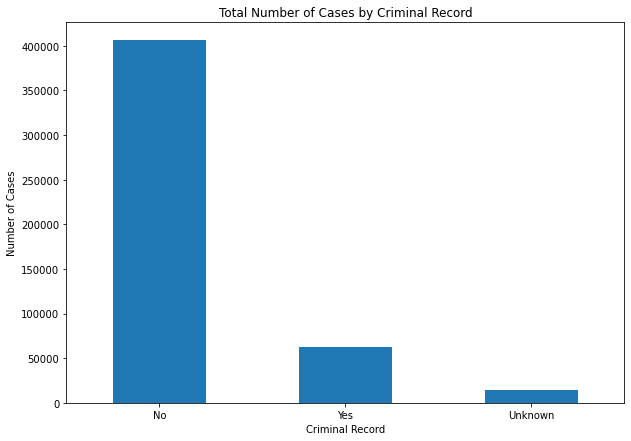

In [177]:
#plot criminal records
plt.figure()
df_asylum2['CRIMINAL_RECORD'].value_counts().plot(kind='bar')
plt.title('Total Number of Cases by Criminal Record')
plt.xlabel('Criminal Record')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.show()

Looking at the graph above, we can see that now we have a category called 'Unknown'. 

We will do one last sanity check to make sure we have imputed all missing values for this column. 

In [178]:
#sanity check - check missing values again
df_asylum2['CRIMINAL_RECORD'].isna().sum()

0

We can confirm that `CRIMINAL_RECORD` column has been updated and missing values have been replaced with unknown. 

Next, we will look at the missing values for `IJ_CODE` column. 

#### `IJ_CODE` Missing Values

Let's look at the missing values for `IJ_CODE`. 

In [179]:
#check datasets missing values
df_asylum2.isna().sum()

IDNCASE                0
NATIONALITY            0
GENDER                 0
BIRTHDATE              0
LANGUAGES              0
ALIEN_CITY          9199
ALIEN_STATE         4161
CASE_DESCRIPTION       0
DATE_OF_ENTRY          0
NOTICE_DATE            0
HEARING_DATE           0
HEARING_CITY           0
HEARING_STATE          0
CUSTODY                0
CRIMINAL_RECORD        0
ATTY_NBR               0
ABSENTIA               5
IJ_CODE             1882
DECISION               0
dtype: int64

In [180]:
#calculate total missing values for  IJ_CODE column
df_asylum2['IJ_CODE'].isna().sum()

1882

There are **1,882** missing values in the `IJ_CODE` column. `IJ_CODE` column has the initials of the Immigration Judges overseeing the Asylum Cases in our dataset. 

Let's look at the value count once again. 

In [181]:
#look at the IJ_CODE value count
df_asylum2['IJ_CODE'].value_counts()

JN     6650
RJF    6568
THS    6489
DWE    5874
RRO    5766
       ... 
JZ        1
AAA       1
KDS       1
RNO       1
MCK       1
Name: IJ_CODE, Length: 697, dtype: int64

Each case is assigned to an immigration judge and we established earlier that there are 697 immigration judges in our dataset. There are **1,882** rows that have missing values. Since we do not have the information on who the judges were for these rows, we can simply fill the missing values as **unknown**.

In [182]:
#fill in missing values as unknown
df_asylum2['IJ_CODE'] = df_asylum2['IJ_CODE'].fillna('Unknown')

In [183]:
#check missing values to make sure
df_asylum2['IJ_CODE'].isna().sum()

0

In [184]:
df_asylum2['IJ_CODE'].nunique()

698

We can confirm that all missing values have been filled as uknown. Previously there were **697** judges however as we have filled missing values with **'unknown'**, there are **698** unique values in the column. 

Next we will look at the missing values in the `ABSENTIA` column.

#### `ABSENTIA` Missing Values

Let's look at the total values missing for the `ABSENTIA` column. 

In [185]:
#look at missing values in our dataset
df_asylum2.isna().sum()

IDNCASE                0
NATIONALITY            0
GENDER                 0
BIRTHDATE              0
LANGUAGES              0
ALIEN_CITY          9199
ALIEN_STATE         4161
CASE_DESCRIPTION       0
DATE_OF_ENTRY          0
NOTICE_DATE            0
HEARING_DATE           0
HEARING_CITY           0
HEARING_STATE          0
CUSTODY                0
CRIMINAL_RECORD        0
ATTY_NBR               0
ABSENTIA               5
IJ_CODE                0
DECISION               0
dtype: int64

In [186]:
#look at ABSENTIA total missing/NaN values
df_asylum2['ABSENTIA'].isna().sum()

5

There are a total of **5** missing values in the `ABSENTIA` column. 

Since we don't know whether the applicant was present or absent, we can either drop the column or fill int he missing values as **No** or as **Unknown**.

Let's once again look at the unique values in this column.

In [187]:
#look at unique values in ABSENTIA column
df_asylum2['ABSENTIA'].unique()

array(['Y', 'N', nan], dtype=object)

In [188]:
#value counts for ABSENTIA column
df_asylum2['ABSENTIA'].value_counts()

N    310420
Y    172419
Name: ABSENTIA, dtype: int64

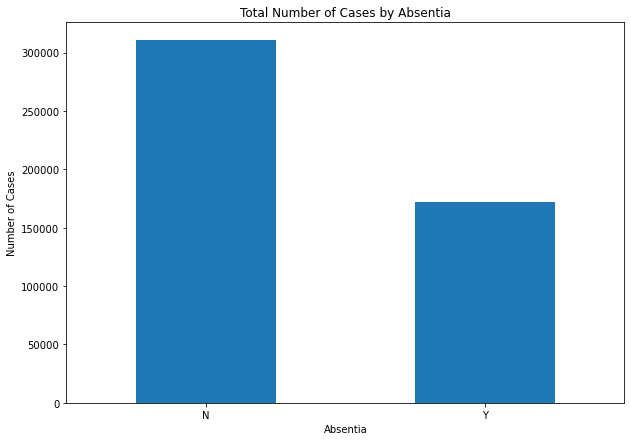

In [189]:
#plot number of cases by absentia
plt.figure()
df_asylum2['ABSENTIA'].value_counts().plot(kind='bar')
plt.title('Total Number of Cases by Absentia')
plt.xlabel('Absentia')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.show()

We can see the majority of applicants were present at their hearing, that being said since we do not want to introduce more bias inot our dataset, we can fill in the missing values as **Unknown**. 

In [190]:
#fill the NaN values as unknown
df_asylum2['ABSENTIA'] = df_asylum2['ABSENTIA'].fillna('Unknown')

In [191]:
#check missing values again
df_asylum2['ABSENTIA'].isna().sum()

0

We have successfully filled in the missing values as 'Unknown'. Let's look at the unique values in the column to make sure. 

In [192]:
#look at unique values in ABSENTIA column
df_asylum2['ABSENTIA'].unique()

array(['Y', 'N', 'Unknown'], dtype=object)

In [193]:
#value counts for ABSENTIA column
df_asylum2['ABSENTIA'].value_counts()

N          310420
Y          172419
Unknown         5
Name: ABSENTIA, dtype: int64

Great, we can confirm that the 5 missing values are now categorized as 'Unknown' in this column. Next we will replace **Y** with **Yes** and **N** with **No**.

In [194]:
#replace y with yes and n with no in column
df_asylum2['ABSENTIA'] = df_asylum2['ABSENTIA'].replace('Y', 'Yes')
df_asylum2['ABSENTIA'] = df_asylum2['ABSENTIA'].replace('N', 'No')

In [195]:
#sanity check  - value counts for ABSENTIA column after replace
df_asylum2['ABSENTIA'].value_counts()

No         310420
Yes        172419
Unknown         5
Name: ABSENTIA, dtype: int64

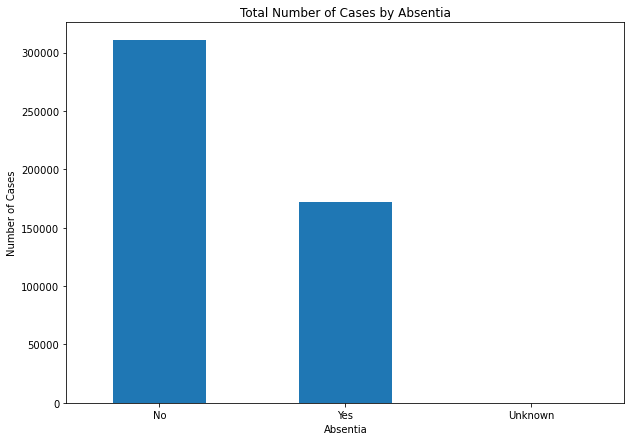

In [196]:
#plot absentia
plt.figure()
df_asylum2['ABSENTIA'].value_counts().plot(kind='bar')
plt.title('Total Number of Cases by Absentia')
plt.xlabel('Absentia')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.show()

Let's do a final sanity check to make sure we have filled in all the missing values for this column. 

In [197]:
#final sanity check
df_asylum2['ABSENTIA'].isna().sum()

0

Great, next we will look at the missing values in `ALIEN_STATE` and `ALIEN_CITY` columns. 

**`ALIEN_STATE` & `ALIEN_CITY` Missing Values**

In this section we will look at the `ALIEN_CITY` and `ALIEN_STATE` missing values. 

First let's look at the percentage of missing values for both columns. 

In [198]:
#check datasets missing values
df_asylum2.isna().sum()/df_asylum2.shape[0]*100

IDNCASE             0.000000
NATIONALITY         0.000000
GENDER              0.000000
BIRTHDATE           0.000000
LANGUAGES           0.000000
ALIEN_CITY          1.905170
ALIEN_STATE         0.861769
CASE_DESCRIPTION    0.000000
DATE_OF_ENTRY       0.000000
NOTICE_DATE         0.000000
HEARING_DATE        0.000000
HEARING_CITY        0.000000
HEARING_STATE       0.000000
CUSTODY             0.000000
CRIMINAL_RECORD     0.000000
ATTY_NBR            0.000000
ABSENTIA            0.000000
IJ_CODE             0.000000
DECISION            0.000000
dtype: float64

`ALIEN_CITY` has **1.9%** of it's values missing, and `ALIEN_STATE` has **0.9%** of its values missing. 

Let's look at the number of missing values for both as well. 

In [199]:
#look at total missing values for ALIEN_STATE
df_asylum2['ALIEN_STATE'].isna().sum()

4161

In [200]:
#look at total missing values for ALIEN_CITY
df_asylum2['ALIEN_CITY'].isna().sum()

9199

We can see that there are **9,199** values missing for the cities column and **4,161** values missing for the state column. 

We can use the info from the `HEARING_CITY` and `HEARING_STATE` columns to fill in the missing values for `ALIEN_CITY` and `ALIEN_STATE`. 

From the above dataset info we knwo that both `HEARING_CITY` and `HEARING_STATE` have no missing values. This is great as it can help us fill in the missing values for the above columns. 

Note that the cities asylum seekers reside in might not be exactly the same as the cities the case hearings are but filling the missing cities in with that information is more accurate than filling them in as unknown. 

Let's look at the Hearing Cites and States associated with the missing values for `ALIEN_CITY` and `ALIEN_STATE`.

In [201]:
#query the data and look at where both are missing and fill in with 'HEARING_CITY' & 'HEARING_STATE'
df_asylum2[
    df_asylum2['ALIEN_STATE'].isna() & (df_asylum2['ALIEN_CITY'].isna())
]

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
2169,7019207,IRAQ,M,1/1987,ARABIC,NaN,NaN,Removal,2010-05-03,2012-04-17,2012-06-19,LINCOLN,NE,Detained,Yes,0,No,DM,REMOVED
2172,6449531,SUDAN,M,1/1965,ARABIC,NaN,NaN,Removal,2008-08-07,2010-02-16,2010-09-21,LINCOLN,NE,Detained,Yes,0,No,DM,REMOVED
2174,6966458,SUDAN,M,1/1987,ARABIC,NaN,NaN,Removal,2005-09-04,2011-12-09,2012-09-18,LINCOLN,NE,Detained,Yes,0,No,DM,REMOVED
2649,7108238,YEMEN,M,1/1953,ARABIC,NaN,NaN,Removal,1996-07-22,2010-11-04,2012-12-13,FISHKILL,NY,Detained,No,0,No,RFS,REMOVED
2653,8198971,YEMEN,M,1/1956,ARABIC,NaN,NaN,Removal,1996-03-03,2017-03-16,2017-07-12,FISHKILL,NY,Detained,Yes,0,No,RFS,REMOVED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481365,7615456,KAZAKHSTAN,M,1/1987,RUSSIAN,NaN,NaN,Removal,2008-10-15,2014-12-23,2015-10-29,NAPANOCH,NY,Detained,No,0,No,RFS,REMOVED
481366,8459112,RUSSIA,M,3/1960,RUSSIAN,NaN,NaN,Removal,2014-01-17,2018-02-27,2018-04-26,NAPANOCH,NY,Detained,Yes,0,No,RFS,REMOVED
481677,6205693,UZEBEKISTAN,M,10/1974,RUSSIAN,NaN,NaN,Removal,1990-11-17,2009-02-19,2009-05-04,FISHKILL,NY,Detained,Yes,1,No,RFS,REMOVED
481678,6582077,UKRAINE,M,11/1951,RUSSIAN,NaN,NaN,Removal,2003-12-30,2010-07-29,2010-11-08,FISHKILL,NY,Detained,No,0,No,RFS,REMOVED


In [202]:
#query the data and look at where ALIEN_STATE is missing but ALIEN_CITY is not
df_asylum2[
    df_asylum2['ALIEN_STATE'].isna() & (df_asylum2['ALIEN_CITY'].notna())
]

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
3149,8014014,ISRAEL,M,7/1984,ARABIC,YORK,NaN,Removal,2011-09-17,2016-09-21,2016-10-05,YORK,PA,Detained,Yes,2,No,WAD,RELIEF/RESCINDED
4068,7681556,ISRAEL,F,7/1981,HEBREW,Aventura,NaN,Removal,2013-05-13,2014-11-22,2015-10-07,MIAMI,FL,Never Detained,No,0,Yes,LTB,REMOVED
5382,7894515,HONDURAS,M,1/2010,SPANISH,UNIONDALE,NaN,Removal,2014-05-29,2015-12-08,2016-06-02,NEW YORK,NY,Never Detained,No,0,Yes,JBC,REMOVED
9669,7479341,MEXICO,M,4/1978,SPANISH,BRONX,NaN,Removal,2012-10-12,2014-04-23,2019-11-29,NEW YORK,NY,Never Detained,No,1,No,NB,RELIEF/RESCINDED
17380,7665648,GUATEMALA,M,7/1963,SPANISH,SAN FRANCISCO,NaN,Removal,2013-10-05,2015-04-16,2015-05-04,SAN FRANCISCO,CA,Detained,Yes,0,No,MJY,REMOVED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476707,8504174,ETHIOPIA,M,10/1985,AMHARIC,"WASHINGTON, DC",NaN,Removal,2016-09-30,2018-05-07,2018-09-11,ARLINGTON,VA,Never Detained,No,0,No,JLM,RELIEF/RESCINDED
478659,7497580,BENIN,F,11/1980,FRENCH,BRONX,NaN,Removal,2001-07-24,2014-05-14,2019-11-29,NEW YORK,NY,Never Detained,No,0,No,BTP,REMOVED
478676,8412625,BURKINA FASO,M,1/1993,FRENCH,BRONX,NaN,Removal,2015-02-17,2017-12-29,2018-06-14,NEW YORK,NY,Never Detained,No,0,Yes,JCS,REMOVED
479243,8386602,BURUNDI,F,10/1986,FRENCH,LEWISTON,NaN,Removal,2013-07-25,2017-11-27,2018-08-23,BOSTON,MA,Never Detained,No,0,Yes,GET,REMOVED


In [203]:
#query the data and look at where ALIEN_STATE is not missing but ALIEN_CITY is missing
df_asylum2[
    df_asylum2['ALIEN_STATE'].notna() & (df_asylum2['ALIEN_CITY'].isna())
]

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
1169,7132891,LAOS,M,4/1966,LAO,NaN,IA,Removal,1981-04-08,2012-12-21,2013-01-17,OMAHA,NE,Detained,Yes,0,No,DM,REMOVED
1170,7131012,LAOS,M,8/1965,LAO,NaN,NE,Removal,1989-03-23,2012-12-10,2013-01-07,OMAHA,NE,Detained,Yes,0,No,DM,REMOVED
1173,7135256,LAOS,M,12/1948,LAO,NaN,IA,Removal,1984-02-23,2012-08-27,2013-01-24,OMAHA,NE,Detained,Yes,0,No,DM,REMOVED
1174,7003655,LAOS,M,2/1968,LAO,NaN,IA,Removal,1989-03-20,2012-05-01,2013-02-21,OMAHA,NE,Detained,No,0,No,JLA,REMOVED
1363,7629720,AFGHANISTAN,M,4/1976,ARABIC,NaN,NJ,Removal,2014-03-11,2015-02-25,2015-06-09,NEWARK,NJ,Never Detained,No,0,No,ASG,RELIEF/RESCINDED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481843,7843429,UKRAINE,M,7/1993,RUSSIAN,NaN,PA,Removal,2013-12-16,2016-02-05,2016-08-03,PITTSBURGH,PA,Never Detained,No,0,Yes,CMH,REMOVED
482405,7047969,GUATEMALA,F,2/1995,"KONJOBAL, WESTERN (AKATEKO)",NaN,AL,Removal,2012-05-15,2012-05-18,2012-11-15,MIAMI,FL,Never Detained,No,0,No,LTB,REMOVED
482475,7519128,GUATEMALA,M,5/1981,"KONJOBAL, WESTERN (AKATEKO)",NaN,FL,Removal,2012-12-28,2014-07-09,2014-09-23,MIAMI,FL,Never Detained,No,0,No,CJS,REMOVED
482491,7519140,GUATEMALA,F,8/2009,"KONJOBAL, WESTERN (AKATEKO)",NaN,FL,Removal,2012-12-28,2014-07-09,2014-09-23,MIAMI,FL,Never Detained,No,0,No,CJS,REMOVED


Options for filling in missing values:

1. We can see both `ALIEN_CITY` and `ALIEN_STATE` share **3,932** rows with missing values. For these rows where we don't have **ALIEN_CITY** or **ALIEN_STATE** we can fill in the missing values with `HEARING_CITY` and `HEARING_STATE` values. 


2. For the `ALIEN_CITY` missing values (**9,199 rows**), fill in both `ALIEN_CITY` and `ALIENT_STATE` with `HEARING_CITY` and `HEARING_STATE`. 


Since `ALIEN_CITY` has more missing values, we will go with option 2 and where `ALIEN_CITY` is missing, we will fill in both `ALIEN_CITY` and `ALIEN_SATE` with the values from `HEARIN_CITY` and `HEARING_STATE`.

Let's start filling in the missing values for `ALIEN_CITY`.

Note that we will do that in 2 steps:
1. where `ALIEN_CITY` values are missing, we will fill in the `ALIEN_STATE` values with `HEARING_STATE` values
2. where `ALIEN_CITY` values are missing, we will fill in the `ALIEN_CITY` values with `HEARING_CITY` values

Let's get started.

In [204]:
#first step - match alien state to hearing state where alien city is missing
df_asylum2['ALIEN_STATE'] = np.where(df_asylum2['ALIEN_CITY'].isna(), df_asylum2['HEARING_STATE'], df_asylum2['ALIEN_STATE'])


In [205]:
#second step - fill in alien city with hearing city where alien city is missing
df_asylum2['ALIEN_CITY'] = np.where(df_asylum2['ALIEN_CITY'].isna(), df_asylum2['HEARING_CITY'], df_asylum2['ALIEN_CITY'])


In [206]:
#check ALIEN_CITY missing values 
df_asylum2['ALIEN_CITY'].isna().sum()

0

We have filled in all the missing values for `ALIEN_CITY` with `HEARING_CITY` values and matched the states as well. 

Now we will look at the remaining missing values for `ALIEN_STATE` and impute those with `HEARING_STATE` values as well. 

In [207]:
#check ALIEN_STATE missing values 
df_asylum2['ALIEN_STATE'].isna().sum()

229

In [208]:
#check missing values in ALIEN_STATE column
df_asylum2[
    df_asylum2['ALIEN_STATE'].isna()
]

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
3149,8014014,ISRAEL,M,7/1984,ARABIC,YORK,NaN,Removal,2011-09-17,2016-09-21,2016-10-05,YORK,PA,Detained,Yes,2,No,WAD,RELIEF/RESCINDED
4068,7681556,ISRAEL,F,7/1981,HEBREW,Aventura,NaN,Removal,2013-05-13,2014-11-22,2015-10-07,MIAMI,FL,Never Detained,No,0,Yes,LTB,REMOVED
5382,7894515,HONDURAS,M,1/2010,SPANISH,UNIONDALE,NaN,Removal,2014-05-29,2015-12-08,2016-06-02,NEW YORK,NY,Never Detained,No,0,Yes,JBC,REMOVED
9669,7479341,MEXICO,M,4/1978,SPANISH,BRONX,NaN,Removal,2012-10-12,2014-04-23,2019-11-29,NEW YORK,NY,Never Detained,No,1,No,NB,RELIEF/RESCINDED
17380,7665648,GUATEMALA,M,7/1963,SPANISH,SAN FRANCISCO,NaN,Removal,2013-10-05,2015-04-16,2015-05-04,SAN FRANCISCO,CA,Detained,Yes,0,No,MJY,REMOVED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476707,8504174,ETHIOPIA,M,10/1985,AMHARIC,"WASHINGTON, DC",NaN,Removal,2016-09-30,2018-05-07,2018-09-11,ARLINGTON,VA,Never Detained,No,0,No,JLM,RELIEF/RESCINDED
478659,7497580,BENIN,F,11/1980,FRENCH,BRONX,NaN,Removal,2001-07-24,2014-05-14,2019-11-29,NEW YORK,NY,Never Detained,No,0,No,BTP,REMOVED
478676,8412625,BURKINA FASO,M,1/1993,FRENCH,BRONX,NaN,Removal,2015-02-17,2017-12-29,2018-06-14,NEW YORK,NY,Never Detained,No,0,Yes,JCS,REMOVED
479243,8386602,BURUNDI,F,10/1986,FRENCH,LEWISTON,NaN,Removal,2013-07-25,2017-11-27,2018-08-23,BOSTON,MA,Never Detained,No,0,Yes,GET,REMOVED


We can see that by filling in all the `ALIEN_CITY` values, we have also filled in most of the `ALIEN_STATE` missing values as well. There are however still **229** missing values that we need to impute. 

We will follow the same steps as before:

1. where `ALIEN_STATE` values are missing, we will fill in the `ALIEN_CITY` values with `HEARING_CITY` values
2. where `ALIEN_STATE` values are missing, we will fill in the `ALIEN_STATE` values with `HEARING_STATE` values

Let's get started.

In [209]:
#first step - match alien city to hearing city where alien state is missing
df_asylum2['ALIEN_CITY'] = np.where(df_asylum2['ALIEN_STATE'].isna(), df_asylum2['HEARING_CITY'], df_asylum2['ALIEN_CITY'])

In [210]:
#second step - fill in alien state with hearing state where alien state is missing
df_asylum2['ALIEN_STATE'] = np.where(df_asylum2['ALIEN_STATE'].isna(), df_asylum2['HEARING_STATE'], df_asylum2['ALIEN_STATE'])

In [211]:
#check ALIEN_STATE missing values 
df_asylum2['ALIEN_STATE'].isna().sum()

0

Great, we have filled in all missing values for `ALIEN_STATE` as well. 

Let's also check our dataset to make sure all is in order. 

In [212]:
#check data - sanity check 1
df_asylum2.head()

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
0,3293523,GUATEMALA,F,12/1971,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,1994-12-14,EL PASO,TX,Never Detained,No,0,Yes,VJ2,DEPORTED
1,4245818,ALBANIA,F,11/1968,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,4,No,CMH,DEPORTED
2,4245825,ALBANIA,M,2/1990,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,1,No,CMH,DEPORTED
3,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2005-01-13,PHILADELPHIA,PA,Released,No,2,No,RPM,RELIEF/RESCINDED
4,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2002-02-26,PHILADELPHIA,PA,Released,No,2,No,RPM,REMOVED


Let's also look at a random smaple of our dataset to make sure that we didn't replace all `ALIEN_CITY` columns with `HEARING_CITY`. 

In [213]:
#check data - sanity check 2
df_asylum2.sample(10)

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
11823,8530799,HONDURAS,M,4/2001,SPANISH,WEST HEMPSTEAD,NY,Removal,2018-03-30,2018-03-31,2018-06-28,NEW YORK,NY,Never Detained,No,0,Yes,EPD,REMOVED
95211,6732813,EL SALVADOR,M,9/1985,SPANISH,ORANGE,CA,Removal,2009-09-23,2011-04-04,2011-04-13,LOS ANGELES,CA,Detained,No,0,No,LJM,REMOVED
369228,7782742,GUATEMALA,M,7/2001,SPANISH,MEMPHIS,TN,Removal,2015-07-07,2015-07-08,2015-11-25,MEMPHIS,TN,Never Detained,No,0,Yes,CEP,REMOVED
348585,7638570,HONDURAS,F,4/2010,SPANISH,AUSTIN,TX,Removal,2014-08-11,2014-08-12,2015-03-30,SAN ANTONIO,TX,Never Detained,No,0,Yes,GDB,REMOVED
131132,6931604,MEXICO,M,4/1976,SPANISH,ORANGE,CA,Removal,2010-07-09,2012-01-18,2012-02-02,LOS ANGELES,CA,Detained,No,0,No,JFW,REMOVED
267412,7716842,MEXICO,M,6/1988,SPANISH,NEWARK,NJ,Removal,2013-12-21,2015-07-02,2015-10-14,ELIZABETH,NJ,Detained,No,0,No,DH,REMOVED
4381,7867707,PAKISTAN,M,8/1985,URDU,YORK,PA,Removal,2004-01-18,2016-02-26,2016-07-26,YORK,PA,Detained,No,0,No,LOB,RELIEF/RESCINDED
48232,8516674,MEXICO,M,7/1988,SPANISH,LOS ANGELES,CA,Removal,2016-11-09,2018-05-21,2018-08-22,LOS ANGELES,CA,Released,No,0,No,AKP,REMOVED
309282,7859920,HONDURAS,F,1/1991,SPANISH,FT. LAUDERDALE,FL,Removal,2015-11-28,2015-11-30,2016-03-14,MIAMI,FL,Released,No,0,No,JDD,REMOVED
2520,7075605,SUDAN,M,1/1969,ARABIC,OMAHA,NE,Removal,2001-08-23,2012-09-05,2012-10-18,OMAHA,NE,Detained,Yes,0,No,DM,REMOVED


Let's do one last check on the missing values in our dataset to make sure we have taken care of all of them.

In [214]:
#check dataset for missing values
df_asylum2.isna().sum()

IDNCASE             0
NATIONALITY         0
GENDER              0
BIRTHDATE           0
LANGUAGES           0
ALIEN_CITY          0
ALIEN_STATE         0
CASE_DESCRIPTION    0
DATE_OF_ENTRY       0
NOTICE_DATE         0
HEARING_DATE        0
HEARING_CITY        0
HEARING_STATE       0
CUSTODY             0
CRIMINAL_RECORD     0
ATTY_NBR            0
ABSENTIA            0
IJ_CODE             0
DECISION            0
dtype: int64

Great, we have successfully imputed all missing values. 

In the basic EDA of our dataset, we saw that `AIEN_STATE` had some values that looked like clerical issues as they were not actual states and were numbers. 

Note that those numbers could be related to the military base or border number where the asylum was declared however since they are very small numbers in each (less than 5) and for the purpose of our report, we will drop those values. 

These could have been replaced/fixed in the above process where we filled in missing values for `ALIEN_CITY` and `ALIEN_STATE` but we will still take a look. 

In [215]:
#state alien resides in number of unique values
df_asylum2['ALIEN_STATE'].nunique()

58

In [216]:
#unique states in the ALIEN_STATE column
df_asylum2['ALIEN_STATE'].unique()

array(['NE', 'PA', 'NY', 'MI', 'FL', 'VA', 'LA', 'CA', 'WA', 'GA', 'KY',
       'CT', 'NJ', 'DE', 'NV', 'OK', 'TX', 'UT', 'NC', 'IL', 'IN', 'OH',
       'HI', 'MA', 'AZ', 'CO', 'MD', 'SC', 'TN', 'NM', 'MN', 'WV', 'ID',
       'MO', 'NH', 'FA', 'WI', 'IA', 'AK', 'GU', 'MP', 'AL', 'MS', 'AR',
       'OR', 'RI', 'ME', 'SD', 'DC', 'PR', 'KS', 'ND', 'WY', 'VI', '<A',
       'MT', 'VT', 'AA'], dtype=object)

Note that **AA** stands for **Armed Forces America** which is a US Military base. 

It looks like we have only one value that could have been a clerical error in entering the value **<A**. This could have been meant as **AA** but entered as **<A**. 

Before dropping it let's look at the value counts.

In [217]:
#look at value counts
df_asylum2['ALIEN_STATE'].value_counts()

TX    82226
FL    64978
CA    56731
NY    29149
GA    23887
AZ    19062
NJ    15012
PA    13807
VA    13103
NC    12946
OH    12727
LA    12361
MD    10845
IL     8542
NE     8390
TN     7959
MA     6810
UT     6556
MI     6094
WA     5913
OK     5410
NV     5094
CO     5063
MN     5043
SC     4738
AL     4268
KY     4113
IA     3249
IN     3169
NM     3039
CT     2591
MO     2589
KS     2451
AR     1862
FA     1412
HI     1390
ID     1347
OR     1344
DE     1276
WI     1258
MS     1252
DC      854
NH      597
RI      520
PR      331
SD      308
ME      230
GU      190
WV      163
MT      147
MP      107
ND      106
WY       91
VI       74
VT       35
AK       30
<A        3
AA        2
Name: ALIEN_STATE, dtype: int64

It looks like **<A** only has 3 values in the dataset. Since most likely this was supposed to be **AA** and it was entered in by mistake as **<A**, instead of dropping it, we will update the State from **<A** to **AA**. 

Again, please note that we are never 100% sure, but we are making the best decision based on the EDA we have done, some additional research, and the information we have available in the dataset. 

In [218]:
#replace <A with AA in ALIEN_STATE column
df_asylum2['ALIEN_STATE'] = df_asylum2['ALIEN_STATE'].replace('<A', 'AA')

In [219]:
#check all values again
df_asylum2['ALIEN_STATE'].value_counts()

TX    82226
FL    64978
CA    56731
NY    29149
GA    23887
AZ    19062
NJ    15012
PA    13807
VA    13103
NC    12946
OH    12727
LA    12361
MD    10845
IL     8542
NE     8390
TN     7959
MA     6810
UT     6556
MI     6094
WA     5913
OK     5410
NV     5094
CO     5063
MN     5043
SC     4738
AL     4268
KY     4113
IA     3249
IN     3169
NM     3039
CT     2591
MO     2589
KS     2451
AR     1862
FA     1412
HI     1390
ID     1347
OR     1344
DE     1276
WI     1258
MS     1252
DC      854
NH      597
RI      520
PR      331
SD      308
ME      230
GU      190
WV      163
MT      147
MP      107
ND      106
WY       91
VI       74
VT       35
AK       30
AA        5
Name: ALIEN_STATE, dtype: int64

Great, we can confirm that **<A** value has been updated to **AA** in our `ALIEN_STATE` column. 

This concludes our Basic Exploratory Data Analysis and Data Cleaning notebook. 

In the next notebook, we will be going through Advanced Exploratory Data Analysis to look at some trends present in our dataset. 

---

# Saving the Data

Now that we have spend the time cleaning and exploring our dataset, we are going to save it to a file as we will be using our cleaned dataset to carry out advanced EDA, data preprocessing / data wrangling and modeling. 

In [220]:
#save dataframe output to use later
df_asylum2.to_csv('asylum_dataset_clean.csv', index=False)

---

# Summary

In this notebook, we looked at Immigration data on Asylum cases from 1961 to 2022. After importing the data, we got initial insight into our dataset by looking at shape, datatype and missing values. 

As part of cleaning our data we:
- Dropped duplicated rows
- Dropped duplicated columns
- Filled in missing values for `ALIEN_CITY`, `ALIEN_STATE`, `DATE_OF_ENTRY`, `NOTICE_DATE`, `HEARING_DATE`, `CRIMINAL_RECORD`, `ATTY_NBR`, `ABSENTIA`, and `IJ_CODE` columns. 

We did a preliminary Exploratory Data Analysis to gain more insight into our data. In this step we:
- Looked at `GENDER` column and saw that **74%** of applicants in our dataset are **Male** and **26%** are **Female**
- Learned that **77%** of applicants spoke **Spanish** (from `LANGUAGES` column) and from `NATIONALITY` column we learned that **77%** of applicants have nationalities from **Mexico**, **Central America**, or **South America**. 
- Learned that majority of the cases in our dataset are **Removal Defensive Asylum**
- Saw that most Asylum applicants reside in **Texas, Florida, and California** and majority of Hearings were also in Immigration courts that were in **Texas, Florida, and California**. 
- Saw that half of the applicants in our dataset were detained, less than the other half had never been detained, and a small number of applicants were detained at some point but released. 
- Learned that majority of the applicants in our dataset did not have a criminal record
- Learned that **64%** of applicants in our dataset were present during their hearing and **36%** were absent during their hearing. 
- Learned that **88%** of cases in our dataset were rejected and only **12%** of cases were approved by immigration judges. 

In the next notebook (**notebook 2**) we will perform Advanced Exploratory Data Analysis to gain more insight into the trends and relationships in our dataset. We will also preprocess our data to prepare it for modeling. 

This concludes our Data Cleaning and Basic Exploratory Data Analysis notebook.

---